<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Sala_Situacional_Diccionario_de_Camas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
sns.set_style('whitegrid')
import requests 


%matplotlib inline
import matplotlib as mpl
#plt.style.use('seaborn-whitegrid')
import numpy as np


In [2]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [3]:
# Source URL (not available outside Peru)
# http://datos.susalud.gob.pe/dataset/data-hist%C3%B3rica-del-registro-de-camas-diarias-disponibles-y-ocupadas-del-formato-f5002-0#{}
# http://datos.susalud.gob.pe/node/223/download

# SUSALUD Base version 1.0 (until 30/March)
url_SUSALUD_CamasFile="Camas_SUSALUD.csv"
# From Dropbox
download_url("https://www.dropbox.com/s/y7mz9lt3uv7kz5r/Camas_SUSALUD.csv?dl=1", url_SUSALUD_CamasFile) 
#download_url("https://socios.spc.org.pe/ytupac/COVID-19/data/"+url_SUSALUD_CamasFile, url_SUSALUD_CamasFile)
df = pd.read_csv(url_SUSALUD_CamasFile, sep='|')
df['FECHA'] = pd.to_datetime(df['FECHA_REGISTRO'], format='%Y%m%d')
df.tail()


,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA
189616,189617,20210331,20210318,Gob Regional,81201.0,CUSCO,QUISPICANCHI,I-4,2523,URCOS,Si,0,0,0,1,5,6,0,0,0,0,0,0,0,0,0,4,12,16,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-18
189617,189618,20210331,20210302,Gob Regional,81211.0,CUSCO,QUISPICANCHI,I-3,2537,OROPESA,No,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-02
189618,189619,20210331,20210225,Gob Regional,81101.0,CUSCO,PAUCARTAMBO,I-4,2510,PAUCARTAMBO,Si,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,10,0,0,0,0,0,0,0,0,0,0,0,0,2021-02-25
189619,189620,20210331,20210321,Gob Regional,81105.0,CUSCO,PAUCARTAMBO,I-4,2520,HUANCARANI,Si,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-21
189620,189621,20210331,20210330,Gob Regional,200801.0,PIURA,SECHURA,I-4,2143,E.S I-4 SECHURA,Si,0,0,0,12,0,12,0,0,0,0,0,0,0,0,0,2,21,23,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30


In [4]:
# SUSALUD Base version 2.0 (from 31/March)
url_SUSALUD_CamasFileV2="Camas_SUSALUD_v2.0.csv"
# Original link http://datos.susalud.gob.pe/node/548/download
#download_url("http://datos.susalud.gob.pe/node/548/download", url_SUSALUD_CamasFileV2)
download_url("https://www.dropbox.com/s/zwefxd2cx6qvsdt/Camas_SUSALUD_v2.0.csv?dl=1", url_SUSALUD_CamasFileV2)
#download_url("https://socios.spc.org.pe/ytupac/COVID-19/data/"+url_SUSALUD_CamasFileV2, url_SUSALUD_CamasFileV2)
df2 = pd.read_csv(url_SUSALUD_CamasFileV2, sep='|')

df2.tail()

#Define cut date (because database is not complete (zero-values) in current day in some regions)


,FECHACORTE,FECHAREGISTRO,CODIGO,NOMBRE,CATEGORIA,NIVEL,INSTITUCIÓN,GRUPO,SUB_GRUPO,MACROREGIONES,UBIGEO,REGION,PROVINCIA,DISTRITO,RESPONSABLE,CUENTA_TRIAJE,NU_ATENC_ULT,CUENTA_ZC,ZC_UCI_AACT_CAM_TOTAL,ZC_UCI_AACT_CAM_INOPERATIVOS,ZC_UCI_AACT_CAM_TOT_OPER,ZC_UCI_AACT_CAM_TOT_DISP,ZC_UCI_AACT_CAM_TOT_OCUP,ZC_UCI_AACT_COC_CAM_CONFIR,ZC_UCI_AACT_COC_CAM_X_CONFIR,ZC_UCI_AACT_COO_CAM_CANULAS,ZC_UCI_AACT_COO_CAM_SIN_VM,ZC_UCI_AACT_COO_CAM_CON_VM,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_UCI_ADUL_COC_CAM_CONFIR,ZC_UCI_ADUL_COC_CAM_X_CONFIR,ZC_UCI_ADUL_COO_CAM_CANULAS,ZC_UCI_ADUL_COO_CAM_SIN_VM,ZC_UCI_ADUL_COO_CAM_CON_VM,ZC_UCI_NEONATAL_CAM_TOTAL,ZC_UCI_NEONATAL_CAM_INOPERATIVOS,...,ZNC_UCIN_PEDIA_CAM_OCUPADO,ZNC_HOSP_ADUL_CAM_TOTAL,ZNC_HOSP_ADUL_CAM_INOPERATIVO,ZNC_HOSP_ADUL_CAM_OPERATIVO,ZNC_HOSP_ADUL_CAM_DISPONIBLE,ZNC_HOSP_ADUL_CAM_OCUPADO,ZNC_HOSP_NEONATAL_CAM_TOTAL,ZNC_HOSP_NEONATAL_CAM_INOPERATIVO,ZNC_HOSP_NEONATAL_CAM_OPERATIVO,ZNC_HOSP_NEONATAL_CAM_DISPONIBLE,ZNC_HOSP_NEONATAL_CAM_OCUPADO,ZNC_HOSP_PEDIA_CAM_TOTAL,ZNC_HOSP_PEDIA_CAM_INOPERATIVO,ZNC_HOSP_PEDIA_CAM_OPERATIVO,ZNC_HOSP_PEDIA_CAM_DISPONIBLE,ZNC_HOSP_PEDIA_CAM_OCUPADO,ZNC_EMER_UTS_CAM_TOTAL,ZNC_EMER_UTS_CAM_INOPERATIVO,ZNC_EMER_UTS_CAM_OPERATIVO,ZNC_EMER_UTS_CAM_DISPONIBLE,ZNC_EMER_UTS_CAM_OCUPADO,ZNC_EMER_UTS_CAM_CON_VM,ZNC_EMER_UTS_CAM_SIN_VM,ZNC_EMER_SOSB_CAM_TOTAL,ZNC_EMER_SOSB_CAM_INOPERATIVO,ZNC_EMER_SOSB_CAM_OPERATIVO,ZNC_EMER_SOSB_CAM_DISPONIBLE,ZNC_EMER_SOSB_CAM_OCUPADO,ZNC_EMER_SOSB_CAM_CON_VM,ZNC_EMER_SOSB_CAM_SIN_VM,ZNC_VENT_CAM_TOTAL,ZNC_VENT_CAM_INOPERATIVO,ZNC_VENT_CAM_OPERATIVO,ZNC_VENT_CAM_DISPONIBLE,ZNC_VENT_CAM_EN_USO,ZNC_MONT_CAM_TOTAL,ZNC_MONT_CAM_INOPERATIVO,ZNC_MONT_CAM_OPERATIVO,ZNC_MONT_CAM_DISPONIBLE,ZNC_MONT_CAM_EN_USO
32445,20210529,2021/05/24 7:41:36 PM,28966.0,CLÍNICA ESPECIALIZADA MIRANDA,II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,Zona Centro,120114.0,JUNIN,HUANCAYO,EL TAMBO,LEILA ESTEFANI YUPANQUI RODRIGUEZ,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,6.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32446,20210529,2021/05/29 7:02:45 AM,5502.0,ATALAYA,I-4,Nivel 1,GOBIERNO REGIONAL,PÚBLICOS,MINSA/GR,Zona Oriente,250201.0,UCAYALI,ATALAYA,RAIMONDI,DARWIN RUIZ CLAVIJO,SI,0.0,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,2.0,14.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32447,20210529,2021/05/29 7:48:06 AM,19787.0,HOSPITAL MUNICIPAL LOS OLIVOS,II-1,Nivel 2,MUNICIPALIDAD DISTRITAL,PÚBLICOS,GL/GP,NaN,150117.0,LIMA,LIMA,LOS OLIVOS,ARMINDA YELITZA SANTILLAN TOLENTINO,SI,16.0,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,43.0,0.0,43.0,36.0,7.0,2.0,0.0,2.0,2.0,0.0,8.0,0.0,8.0,8.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,7.0,0.0,7.0,7.0,0.0
32448,20210529,2021/05/28 5:37:25 PM,22113.0,CLINICA SANTA JULIA S.A.C. (CLINICA SANTA JULIA),II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,NaN,150114.0,LIMA,LIMA,LA MOLINA,OSCAR ALBERTO ALVARADO GALINDO,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0
32449,20210529,2021/05/29 6:27:22 AM,20976.0,VISUAL CENTER CLINICA DE OJOS,II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,NaN,150136.0,LIMA,LIMA,SAN MIGUEL,CARLOS ALFONSO ZUMAETA DIAZ,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [5]:
#df2['FECHA'] = pd.to_datetime(df2['FECHAREGISTRO'].str.extract[1:10])
df2['FECHA'] = pd.to_datetime(df2['FECHAREGISTRO'].str.slice(0, 10))
df2['FECHA'].tail()
df2['FECHACORTEX'] = df2['FECHACORTE'].astype(str)
df2['FECHACORTE'] = pd.to_datetime(df2['FECHACORTEX'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))
df2.tail(3)

,FECHACORTE,FECHAREGISTRO,CODIGO,NOMBRE,CATEGORIA,NIVEL,INSTITUCIÓN,GRUPO,SUB_GRUPO,MACROREGIONES,UBIGEO,REGION,PROVINCIA,DISTRITO,RESPONSABLE,CUENTA_TRIAJE,NU_ATENC_ULT,CUENTA_ZC,ZC_UCI_AACT_CAM_TOTAL,ZC_UCI_AACT_CAM_INOPERATIVOS,ZC_UCI_AACT_CAM_TOT_OPER,ZC_UCI_AACT_CAM_TOT_DISP,ZC_UCI_AACT_CAM_TOT_OCUP,ZC_UCI_AACT_COC_CAM_CONFIR,ZC_UCI_AACT_COC_CAM_X_CONFIR,ZC_UCI_AACT_COO_CAM_CANULAS,ZC_UCI_AACT_COO_CAM_SIN_VM,ZC_UCI_AACT_COO_CAM_CON_VM,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_UCI_ADUL_COC_CAM_CONFIR,ZC_UCI_ADUL_COC_CAM_X_CONFIR,ZC_UCI_ADUL_COO_CAM_CANULAS,ZC_UCI_ADUL_COO_CAM_SIN_VM,ZC_UCI_ADUL_COO_CAM_CON_VM,ZC_UCI_NEONATAL_CAM_TOTAL,ZC_UCI_NEONATAL_CAM_INOPERATIVOS,...,ZNC_HOSP_ADUL_CAM_INOPERATIVO,ZNC_HOSP_ADUL_CAM_OPERATIVO,ZNC_HOSP_ADUL_CAM_DISPONIBLE,ZNC_HOSP_ADUL_CAM_OCUPADO,ZNC_HOSP_NEONATAL_CAM_TOTAL,ZNC_HOSP_NEONATAL_CAM_INOPERATIVO,ZNC_HOSP_NEONATAL_CAM_OPERATIVO,ZNC_HOSP_NEONATAL_CAM_DISPONIBLE,ZNC_HOSP_NEONATAL_CAM_OCUPADO,ZNC_HOSP_PEDIA_CAM_TOTAL,ZNC_HOSP_PEDIA_CAM_INOPERATIVO,ZNC_HOSP_PEDIA_CAM_OPERATIVO,ZNC_HOSP_PEDIA_CAM_DISPONIBLE,ZNC_HOSP_PEDIA_CAM_OCUPADO,ZNC_EMER_UTS_CAM_TOTAL,ZNC_EMER_UTS_CAM_INOPERATIVO,ZNC_EMER_UTS_CAM_OPERATIVO,ZNC_EMER_UTS_CAM_DISPONIBLE,ZNC_EMER_UTS_CAM_OCUPADO,ZNC_EMER_UTS_CAM_CON_VM,ZNC_EMER_UTS_CAM_SIN_VM,ZNC_EMER_SOSB_CAM_TOTAL,ZNC_EMER_SOSB_CAM_INOPERATIVO,ZNC_EMER_SOSB_CAM_OPERATIVO,ZNC_EMER_SOSB_CAM_DISPONIBLE,ZNC_EMER_SOSB_CAM_OCUPADO,ZNC_EMER_SOSB_CAM_CON_VM,ZNC_EMER_SOSB_CAM_SIN_VM,ZNC_VENT_CAM_TOTAL,ZNC_VENT_CAM_INOPERATIVO,ZNC_VENT_CAM_OPERATIVO,ZNC_VENT_CAM_DISPONIBLE,ZNC_VENT_CAM_EN_USO,ZNC_MONT_CAM_TOTAL,ZNC_MONT_CAM_INOPERATIVO,ZNC_MONT_CAM_OPERATIVO,ZNC_MONT_CAM_DISPONIBLE,ZNC_MONT_CAM_EN_USO,FECHA,FECHACORTEX
32447,2021-05-29,2021/05/29 7:48:06 AM,19787.0,HOSPITAL MUNICIPAL LOS OLIVOS,II-1,Nivel 2,MUNICIPALIDAD DISTRITAL,PÚBLICOS,GL/GP,NaN,150117.0,LIMA,LIMA,LOS OLIVOS,ARMINDA YELITZA SANTILLAN TOLENTINO,SI,16.0,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,43.0,36.0,7.0,2.0,0.0,2.0,2.0,0.0,8.0,0.0,8.0,8.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,7.0,0.0,7.0,7.0,0.0,2021-05-29,20210529
32448,2021-05-29,2021/05/28 5:37:25 PM,22113.0,CLINICA SANTA JULIA S.A.C. (CLINICA SANTA JULIA),II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,NaN,150114.0,LIMA,LIMA,LA MOLINA,OSCAR ALBERTO ALVARADO GALINDO,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,2021-05-28,20210529
32449,2021-05-29,2021/05/29 6:27:22 AM,20976.0,VISUAL CENTER CLINICA DE OJOS,II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,NaN,150136.0,LIMA,LIMA,SAN MIGUEL,CARLOS ALFONSO ZUMAETA DIAZ,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-29,20210529


In [6]:
df2.info()
fechaCorte = '2021-05-28'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32450 entries, 0 to 32449
Columns: 208 entries, FECHACORTE to FECHACORTEX
dtypes: datetime64[ns](2), float64(191), object(15)
memory usage: 51.5+ MB


In [7]:
df['TOTAL_CAMAS_UCI'] = df['CAMAS_ZC_TOTAL'] + df['UCI_ADULTOS_CAMAS_TOTAL'] + df['UCI_PEDIATRIA_CAMAS_TOTAL']

df['TOTAL_CAMAS'] = df['CAMAS_ZC_TOTAL'] + \
                    df['CAMAS_ZNC_TOTAL'] + \
                    df['UCI_ADULTOS_CAMAS_TOTAL'] + \
                    df['UCI_PEDIATRIA_CAMAS_TOTAL'] + \
                    df['UCIN_CAMAS_TOTAL'] + \
                    df['CAMAS_HOSP_TOTAL']

df['TOTAL_CAMAS_DISPONIBLES'] = df['CAMAS_ZC_DISPONIBLES'] + \
                    df['CAMAS_ZNC_DISPONIBLE'] + \
                    df['UCI_ADULTOS_CAMAS_DISPONIBLE'] + \
                    df['UCI_PEDIATRIA_CAMAS_DISPONIBLE'] + \
                    df['UCIN_CAMAS_DISPONIBLE'] + \
                    df['CAMAS_HOSP_DISPONIBLE']

df['TOTAL_CAMAS_OCUPADAS'] = df['CAMAS_ZC_OCUPADOS'] + \
                    df['CAMAS_ZNC_OCUPADOS'] + \
                    df['UCI_ADULTOS_CAMAS_OCUPADAS'] + \
                    df['UCI_PEDIATRIA_CAMAS_OCUPADAS'] + \
                    df['UCIN_CAMAS_OCUPADAS'] + \
                    df['CAMAS_HOSP_OCUPADAS']

# Totales Perú

In [8]:
df_all_regions = df.sort_values('FECHA')
df_all_regions = df_all_regions[df_all_regions['FECHA'] <= fechaCorte]
df_all_regions.reset_index(inplace=True, drop=True)
df_all_regions.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS_UCI,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
189616,189295,20210331,20210331,Gob Regional,120201.0,JUNIN,CONCEPCION,II-E,27857,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLÁSICAS...,No,0,0,0,0,0,0,2,5,7,0,0,0,0,0,0,48,12,60,0,0,0,1,5,6,0,0,0,0,0,0,2021-03-31,7,67,17,50
189617,189177,20210331,20210331,Gob Regional,50101.0,AYACUCHO,HUAMANGA,II-2,3543,"HOSPITAL REGIONAL DE AYACUCHO ""MIGUEL ANGEL MA...",Si,10,0,10,100,54,154,3,12,15,3,11,14,8,0,8,123,243,366,10,2,12,3,12,15,0,14,14,4,0,4,2021-03-31,39,567,320,247
189618,189151,20210331,20210331,MINSA,150101.0,LIMA,LIMA,III-1,6206,NACIONAL DOS DE MAYO,Si,50,0,50,197,0,197,12,0,12,8,0,8,0,0,0,134,2,136,50,0,50,12,0,12,0,0,0,0,0,0,2021-03-31,70,403,2,401
189619,189052,20210331,20210331,Privado,150140.0,LIMA,LIMA,II-2,9988,CLINICA SAN PABLO,Si,24,0,24,50,2,52,6,0,6,3,1,4,0,0,0,47,0,47,24,0,24,3,0,3,3,1,4,0,0,0,2021-03-31,34,133,3,130
189620,189357,20210331,20210331,MINSA,150111.0,LIMA,LIMA,III-1,5946,HOSPITAL NACIONAL HIPOLITO UNANUE,Si,26,0,26,207,2,209,6,0,6,0,0,0,6,0,6,209,78,287,26,0,26,6,0,6,0,0,0,4,0,4,2021-03-31,32,534,80,454


In [9]:
df_all_regions_sin_duplicados = df_all_regions.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_all_regions_sin_duplicados = df_all_regions_sin_duplicados.drop_duplicates()

In [10]:
df_all_regions_sin_duplicados.NOMBRE.unique()

array(['CLINICA MONTEFIORI', 'CHENET CLINICA ESPECIALIZADA',
       'OXIGEN MEDICAL NETWORK', 'CLINICA LA LUZ', 'CLINICA EL GOLF',
       'CLINICA SAN PABLO TRUJILLO', 'CLÍNICA MÉDICA CAYETANO HEREDIA',
       'CLINICA SAN FELIPE S.A.', 'CLINICA ANGLOAMERICANA',
       'CLINICA SAN JUDAS TADEO', 'CLINICA PADRE LUIS TEZZA',
       'CLINICA GOOD HOPE', 'CLÍNICA FÁTIMA',
       'CLINICA SAN LORENZO S.R.L.', 'CLINICA VALLESUR',
       'CLINICA SANTA MARIA DEL SUR', 'CLINICA RICARDO PALMA',
       'CLINICA DEL INCA', 'CLINICA SAN JUAN DE DIOS',
       'Clínica Internacional - Sede Lima', 'CLINICA JAVIER PRADO',
       'CLINICA MONTE SINAI JULIACA E.I.R.L.',
       'CLINICA AMERICANA DE JULIACA', 'CLINICA STELLA MARIS',
       'CLINICA MEDICO QUIRURGICO HUANCAYO', 'AUNA CLINICA MIRAFLORES',
       'SERVICIOS MEDICOS CLINICA SANTA ANITA SRL',
       'CLINICA DEL PACIFICO', 'CLINICA AREQUIPA S.A.',
       'SANTA MARIA DE CUTERVO', 'HOSPITAL  DIOSPI SUYANA',
       'HOSPITAL  MOYOBAMBA', 'CLINI

## Camas ZC (UCI en Zona COVID-19)

In [11]:
df_all_reg_sin_dup_zc = df_all_regions_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_all_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-27,2208,2288
2021-03-28,2199,2290
2021-03-29,2234,2335
2021-03-30,2319,2403
2021-03-31,118,118


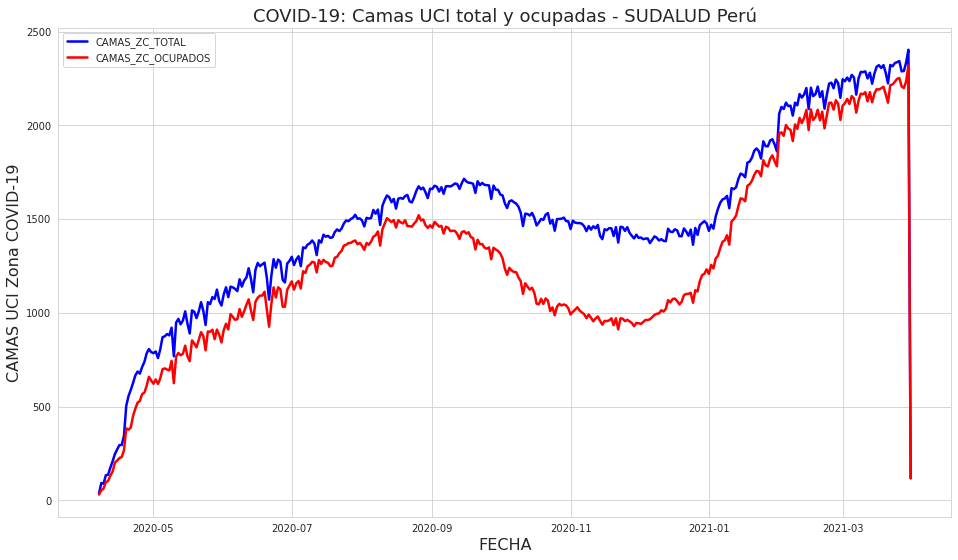

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_all_reg_sin_dup_zc, x=df_all_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='CAMAS_ZC_TOTAL', ax=ax1, linewidth=2.5,color='b')
sns.lineplot(data=df_all_reg_sin_dup_zc, x=df_all_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='CAMAS_ZC_OCUPADOS', ax=ax1,linewidth=2.5,color='r')
ax1.set_ylabel('CAMAS UCI Zona COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.title('COVID-19: Camas UCI total y ocupadas - SUDALUD Perú',fontsize=18)
plt.savefig('CamasUCI_ZC_TotalPeru.pdf')
plt.show()


## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [13]:
df_all_reg_sin_dup_znc = df_all_regions_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_all_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-27,14949,21512
2021-03-28,15113,21511
2021-03-29,15349,22127
2021-03-30,15580,22305
2021-03-31,622,769


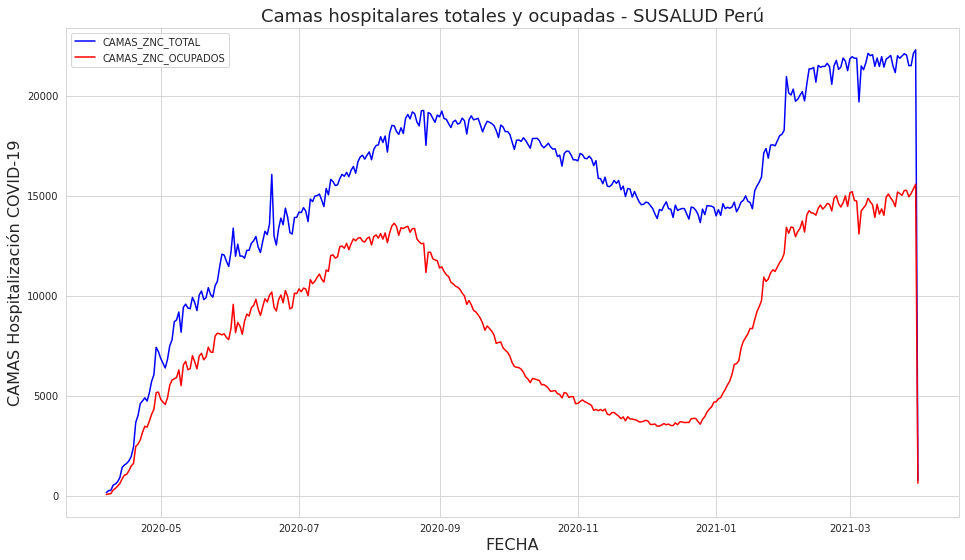

In [14]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_all_reg_sin_dup_znc, x=df_all_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='CAMAS_ZNC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_all_reg_sin_dup_znc, x=df_all_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='CAMAS_ZNC_OCUPADOS',  ax=ax1, color='r')
ax1.set_ylabel('CAMAS Hospitalización COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.title('Camas hospitalares totales y ocupadas - SUSALUD Perú',fontsize=18)
plt.savefig('CamasHosp_ZC_TotalPeru.pdf')
plt.show()


## Ventiladores UCI ZC Ocupados

In [15]:
df_all_reg_sin_dup_vuzc = df_all_regions_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_all_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-03-27,2238,2353
2021-03-28,2212,2339
2021-03-29,2246,2398
2021-03-30,2331,2449
2021-03-31,118,120


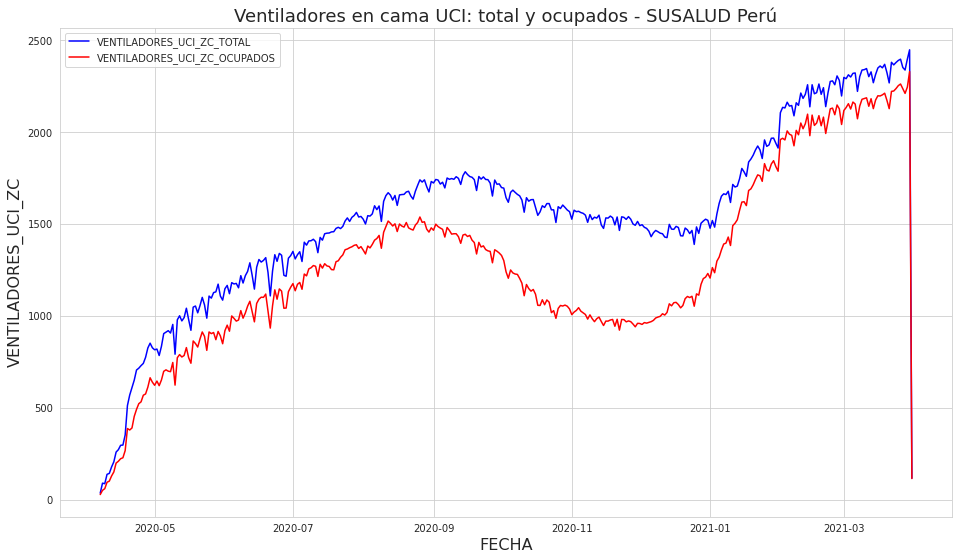

In [16]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_all_reg_sin_dup_vuzc, x=df_all_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1,color='b')
sns.lineplot(data=df_all_reg_sin_dup_vuzc, x=df_all_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS', ax=ax1,color='r')
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.title('Ventiladores en cama UCI: total y ocupados - SUSALUD Perú',fontsize=18)
plt.show()

# Lima Region + Lima Metropolitana

In [17]:
df_lima_region = df[df['REGION'] == 'LIMA'].sort_values('FECHA')
df_lima_region = df_lima_region[df_lima_region['FECHA'] <= fechaCorte]
df_lima_region.reset_index(inplace=True, drop=True)
df_lima_region.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS_UCI,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
66068,188852,20210330,20210330,Privado,150501.0,LIMA,CAÑETE,II-1,26070,CLINICA CORAZON DE JESUS,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8,12,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,12,8,4
66069,188673,20210330,20210330,Privado,150113.0,LIMA,LIMA,II-E,9089,ONCOGYN CLINICA INTEGRAL,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,5,5,0
66070,189357,20210331,20210331,MINSA,150111.0,LIMA,LIMA,III-1,5946,HOSPITAL NACIONAL HIPOLITO UNANUE,Si,26,0,26,207,2,209,6,0,6,0,0,0,6,0,6,209,78,287,26,0,26,6,0,6,0,0,0,4,0,4,2021-03-31,32,534,80,454
66071,189052,20210331,20210331,Privado,150140.0,LIMA,LIMA,II-2,9988,CLINICA SAN PABLO,Si,24,0,24,50,2,52,6,0,6,3,1,4,0,0,0,47,0,47,24,0,24,3,0,3,3,1,4,0,0,0,2021-03-31,34,133,3,130
66072,189151,20210331,20210331,MINSA,150101.0,LIMA,LIMA,III-1,6206,NACIONAL DOS DE MAYO,Si,50,0,50,197,0,197,12,0,12,8,0,8,0,0,0,134,2,136,50,0,50,12,0,12,0,0,0,0,0,0,2021-03-31,70,403,2,401


In [18]:
df_lima_region_sin_duplicados = df_lima_region.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_lima_region_sin_duplicados = df_lima_region_sin_duplicados.drop_duplicates()

In [19]:
df_lima_region_sin_duplicados.NOMBRE.unique()

array(['CLINICA MONTEFIORI', 'CLINICA EL GOLF',
       'CLINICA SANTA MARIA DEL SUR', 'CLÍNICA MÉDICA CAYETANO HEREDIA',
       'CLINICA STELLA MARIS', 'CLINICA SAN FELIPE S.A.',
       'CLINICA ANGLOAMERICANA', 'CLINICA PADRE LUIS TEZZA',
       'CLINICA GOOD HOPE', 'CLINICA RICARDO PALMA', 'CLINICA DEL INCA',
       'CLINICA JAVIER PRADO', 'CLINICA SAN JUDAS TADEO',
       'Clínica Internacional - Sede Lima', 'CLÍNICA INTERNACIONAL',
       'GUILLERMO KAELIN DE LA FUENTE', 'CLINICA MONTERRICO',
       'CLINICA MONTESUR', 'CL ESPECIALIDADES MEDICAS', 'ONCOSALUD',
       'AUNA CLÍNICA DELGADO',
       'INSTITUTO DEL CEREBRO Y LA COLUMNA VERTEBRAL',
       'CLINICA LIMATAMBO', 'CLINICA SAN GABRIEL S.A.C.',
       'CLINICA SAN BORJA', 'CLINICA SAN JUAN BAUTISTA',
       'CLINICA SAN PABLO', 'CLINICA MARIA DEL SOCORRO',
       'CLINICA JESUS DEL NORTE', 'INCOR', 'CLINICA SANTA ISABEL',
       'HOSPITAL II CAÑETE', 'CLINICA PETRAS',
       'INO DR. FRANCISCO CONTRERAS C.', 'HOSPITAL DE APO

## Camas ZC (UCI en Zona COVID-19)

In [20]:
df_lim_reg_sin_dup_zc = df_lima_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_lim_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-27,1137,1142
2021-03-28,1114,1123
2021-03-29,1139,1147
2021-03-30,1188,1196
2021-03-31,100,100


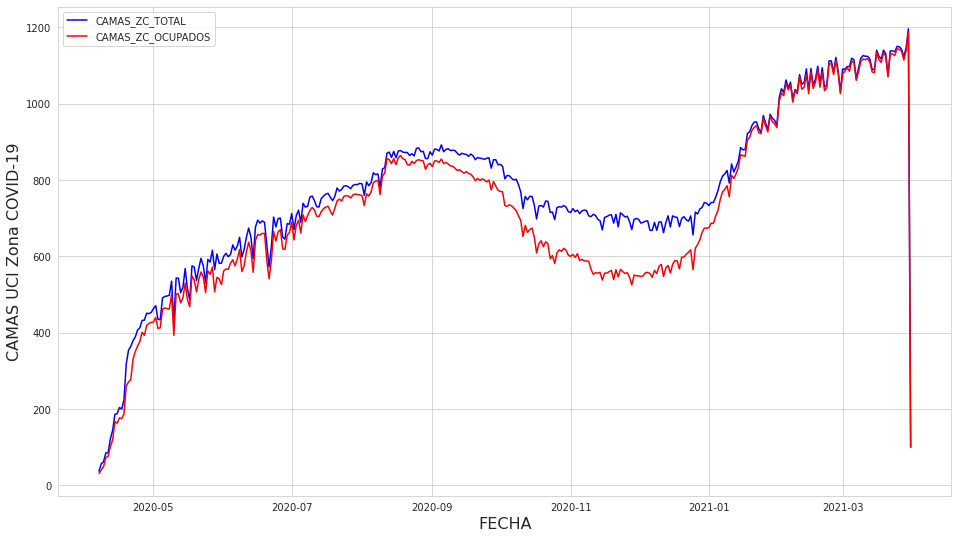

In [21]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_zc, x=df_lim_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='CAMAS_ZC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_lim_reg_sin_dup_zc, x=df_lim_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='CAMAS_ZC_OCUPADOS', ax=ax1,color='r')
ax1.set_ylabel('CAMAS UCI Zona COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasUCI_ZC_Lima.pdf')
plt.show()


## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [22]:
df_lim_reg_sin_dup_znc = df_lima_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_lim_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-27,8109,9304
2021-03-28,8020,9256
2021-03-29,7980,9254
2021-03-30,8129,9343
2021-03-31,454,458


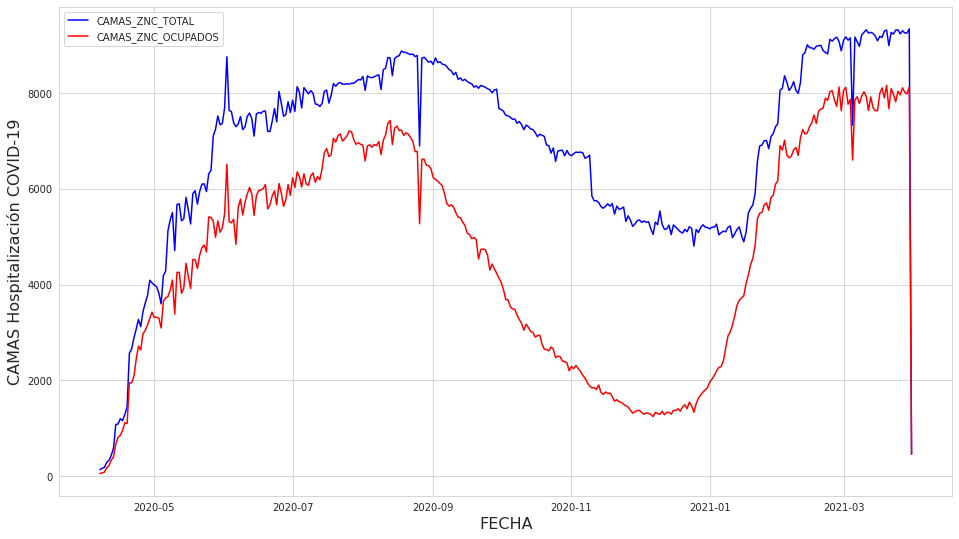

In [23]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_znc, x=df_lim_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='CAMAS_ZNC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_lim_reg_sin_dup_znc, x=df_lim_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='CAMAS_ZNC_OCUPADOS',  ax=ax1, color='r')
ax1.set_ylabel('CAMAS Hospitalización COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasHosp_ZC_Lima.pdf')
plt.show()


## Camas UCI Adultos (no COVID-19)

In [24]:
df_lim_reg_sin_dup_ua = df_lima_region_sin_duplicados.groupby(['FECHA'])['UCI_ADULTOS_CAMAS_OCUPADAS', 'UCI_ADULTOS_CAMAS_TOTAL'].sum()
df_lim_reg_sin_dup_ua.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_TOTAL
FECHA,,
2021-03-27,216,255
2021-03-28,220,258
2021-03-29,212,254
2021-03-30,216,259
2021-03-31,24,24


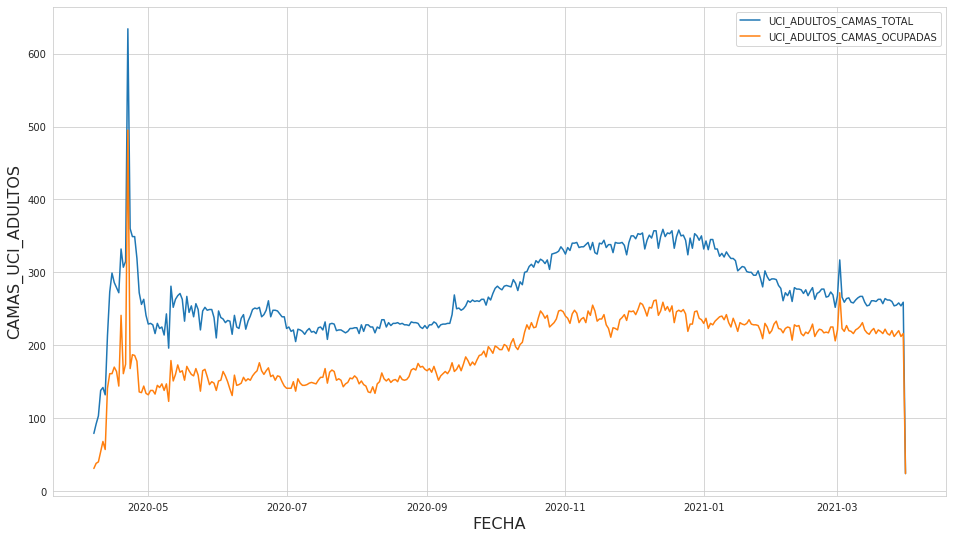

In [25]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_ua, x=df_lim_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax1)
sns.lineplot(data=df_lim_reg_sin_dup_ua, x=df_lim_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_UCI_ADULTOS', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Camas Hospitaliarias Ocupadas

In [26]:
df_lim_reg_sin_dup_cho = df_lima_region_sin_duplicados.groupby(['FECHA'])['CAMAS_HOSP_OCUPADAS', 'CAMAS_HOSP_TOTAL'].sum()
df_lim_reg_sin_dup_cho.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_TOTAL
FECHA,,
2021-03-27,6041,9294
2021-03-28,6087,9234
2021-03-29,6018,9230
2021-03-30,6135,9304
2021-03-31,390,470


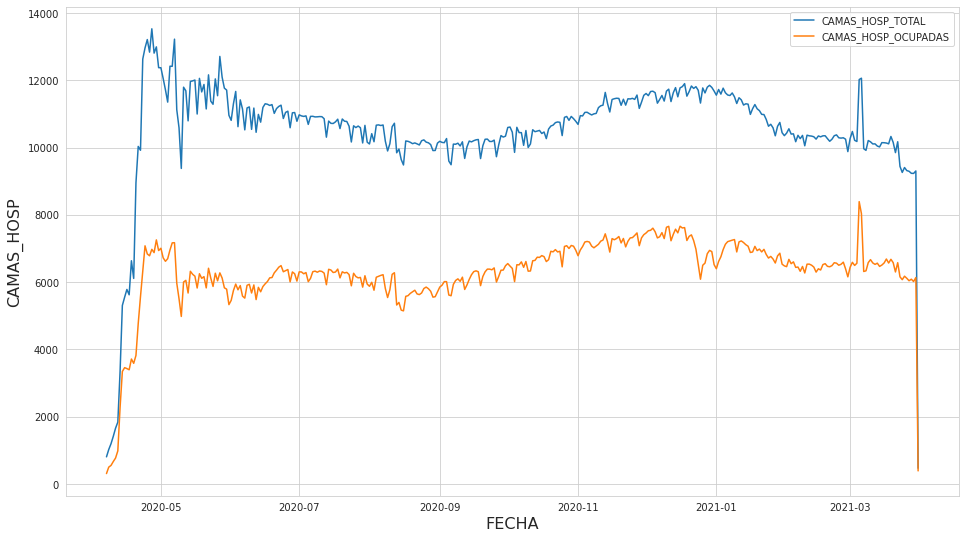

In [27]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_cho, x=df_lim_reg_sin_dup_cho.index, y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax1)
sns.lineplot(data=df_lim_reg_sin_dup_cho, x=df_lim_reg_sin_dup_cho.index, y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_HOSP', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Ventiladores UCI ZC Ocupados

In [28]:
df_lim_reg_sin_dup_vuzc = df_lima_region_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_lim_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-03-27,1142,1154
2021-03-28,1119,1136
2021-03-29,1144,1162
2021-03-30,1193,1208
2021-03-31,100,100


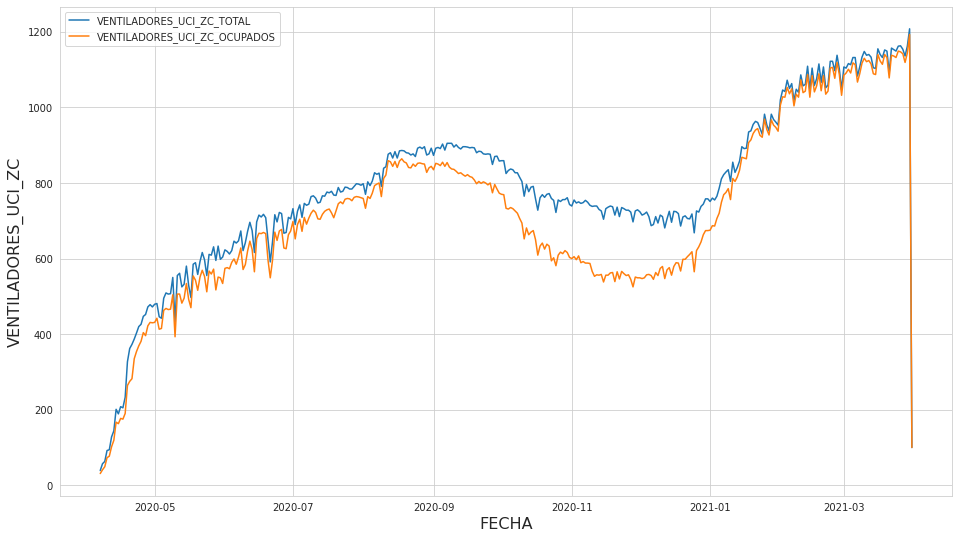

In [29]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_lim_reg_sin_dup_vuzc, x=df_lim_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1)
sns.lineplot(data=df_lim_reg_sin_dup_vuzc, x=df_lim_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS',  ax=ax1)
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

# Tacna, Region

In [30]:
df_tacna_region = df[df['REGION'] == 'TACNA'].sort_values('FECHA')
df_tacna_region = df_tacna_region[df_tacna_region['FECHA'] <= fechaCorte]
df_tacna_region.reset_index(inplace=True, drop=True)
df_tacna_region.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS_UCI,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
1666,188946,20210330,20210330,Privado,230302.0,TACNA,JORGE BASADRE,II-1,18230,HOSPITAL TOQUEPALA,Si,0,0,0,1,8,9,0,0,0,0,0,0,0,0,0,7,7,14,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,23,15,8
1667,189096,20210331,20210330,EsSalud,230103.0,TACNA,TACNA,II-2,10185,HOSPITAL III DANIEL ALCIDES CARRIÓN,Si,23,2,25,46,165,211,5,0,5,0,0,0,0,6,6,69,49,118,23,2,25,3,2,5,0,0,0,0,0,0,2021-03-30,30,365,222,143
1668,189122,20210331,20210330,Privado,230101.0,TACNA,TACNA,II-1,27462,CLINICA LA LUZ,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,20,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,20,10,10
1669,189413,20210331,20210330,Gob Regional,230101.0,TACNA,TACNA,II-2,2864,HOSPITAL HIPOLITO UNANUE DE TACNA,Si,14,1,15,52,122,174,2,1,3,2,1,3,0,0,0,0,195,195,14,1,15,2,1,3,2,1,3,0,0,0,2021-03-30,21,390,320,70
1670,189538,20210331,20210330,Privado,230302.0,TACNA,JORGE BASADRE,II-1,18230,HOSPITAL TOQUEPALA,Si,0,0,0,1,8,9,0,0,0,0,0,0,0,0,0,7,7,14,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,23,15,8


In [31]:
df_tacna_region_sin_duplicados = df_tacna_region.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_tacna_region_sin_duplicados = df_tacna_region_sin_duplicados.drop_duplicates()

In [32]:
df_tacna_region_sin_duplicados.NOMBRE.unique()

array(['CLINICA LA LUZ', 'HOSPITAL III DANIEL ALCIDES CARRIÓN',
       'HOSPITAL HIPOLITO UNANUE DE TACNA', 'CLINICA ISABEL',
       'HOSPITAL TOQUEPALA'], dtype=object)

## Dividido por Instituciones

In [33]:
def subplot(institucion):
    df_institucion = df_tacna_region_sin_duplicados[df_tacna_region_sin_duplicados['NOMBRE'] == institucion]

    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_TOTAL",  label='Camas UCI Total', ax=ax1,color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas', ax=ax1,color='r')
    ax1.set_ylabel('Camas UCI COVID-19', fontsize=14)
    ax1.set_xlabel('Fecha', fontsize=16)

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_TOTAL",  label='Camas Hosp Total', ax=ax2, color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_OCUPADOS", label='Camas Hosp Total',  ax=ax2, color='r')
    ax2.set_ylabel('Camas Hospitalarias COVID-19', fontsize=14)
    ax2.set_xlabel('Fecha', fontsize=16)

    plt.suptitle(institucion, fontsize=20)
    plt.show()

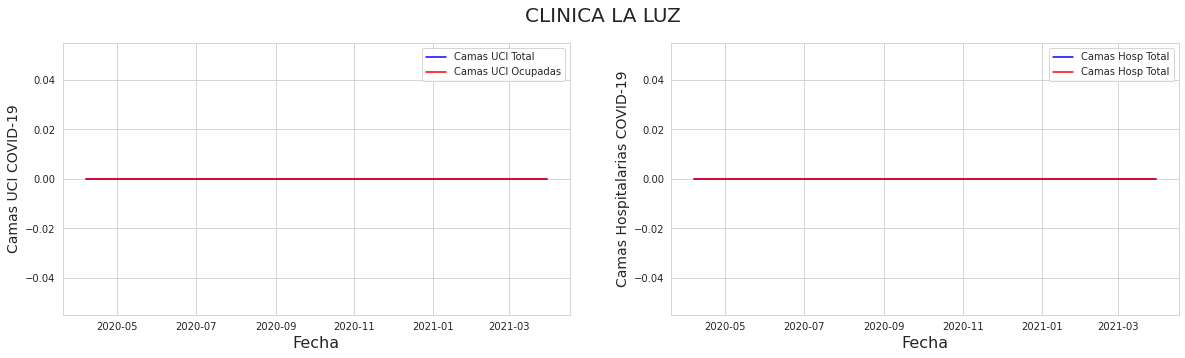

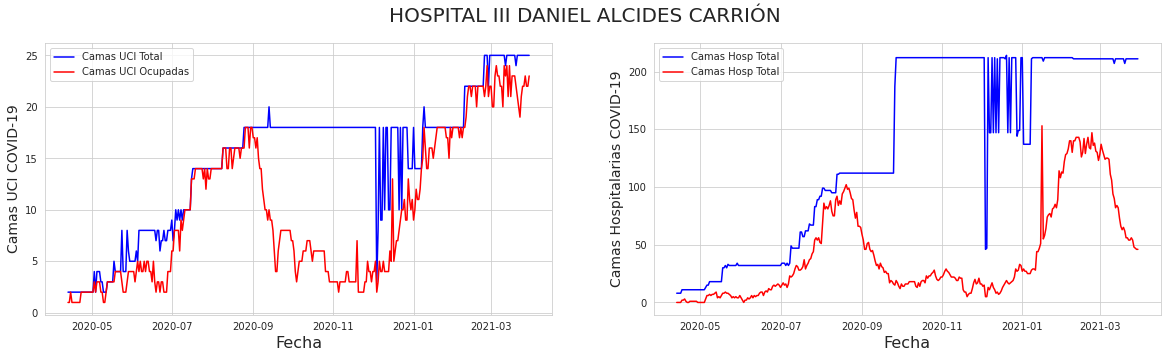

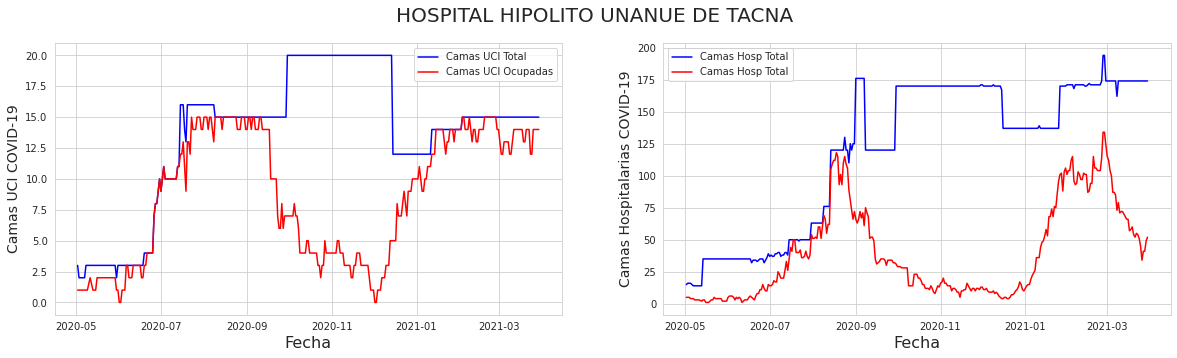

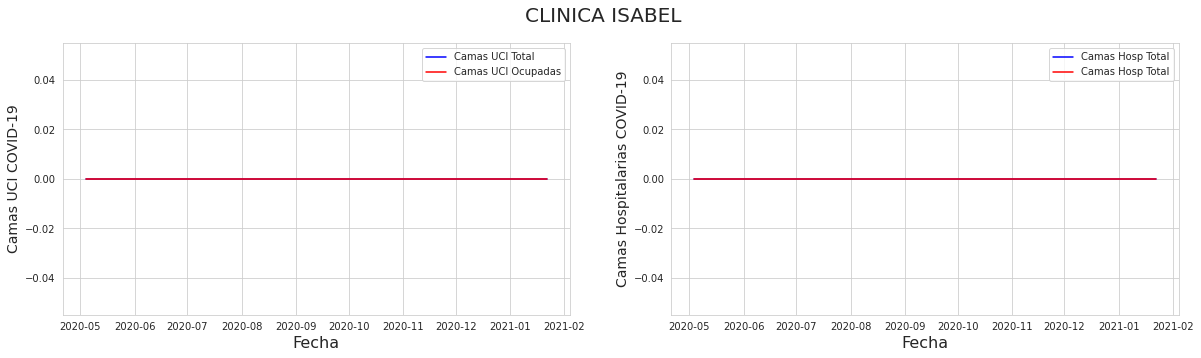

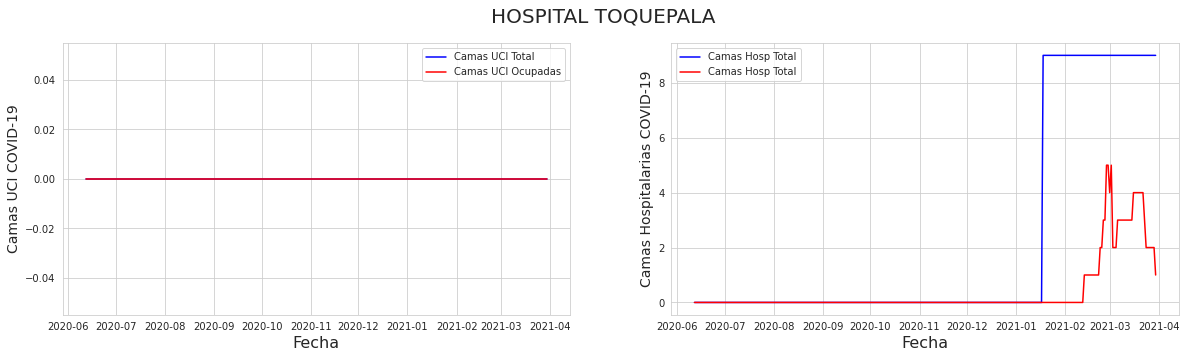

In [34]:
for institucion in df_tacna_region_sin_duplicados.NOMBRE.unique():
    subplot(institucion)

## Camas ZC (UCI en Zona COVID-19)

In [35]:
df_tcq_reg_sin_dup_zc = df_tacna_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_tcq_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-26,36,40
2021-03-27,37,40
2021-03-28,36,40
2021-03-29,36,40
2021-03-30,37,40


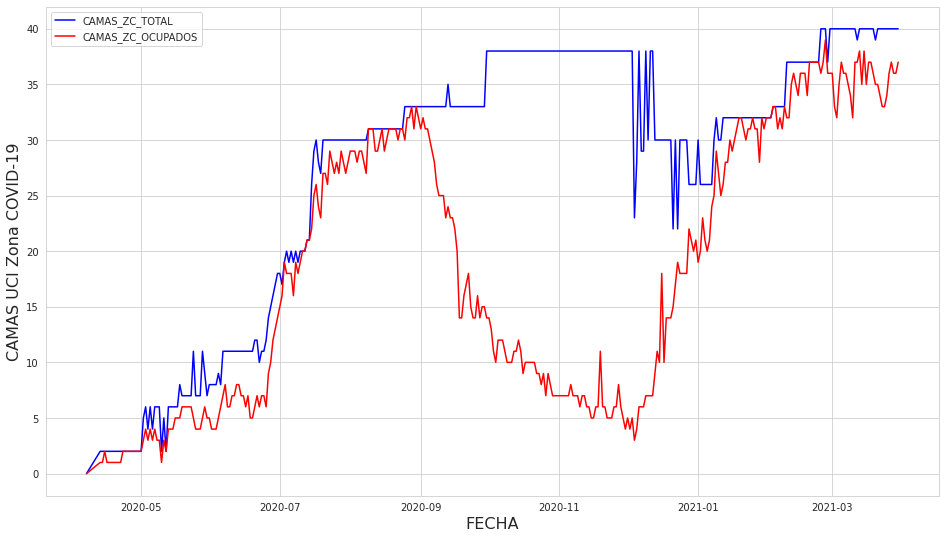

In [36]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_zc, x=df_tcq_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='CAMAS_ZC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_tcq_reg_sin_dup_zc, x=df_tcq_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='CAMAS_ZC_OCUPADOS', ax=ax1,color='r')
ax1.set_ylabel('CAMAS UCI Zona COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasUCI_ZC_Tacna.pdf')
plt.show()


## Camas ZNC (Camas de cuidados intermedios, hospitalización, emergencia, itinerantes COVID-19)

In [37]:
df_tcq_reg_sin_dup_znc = df_tacna_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_tcq_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-26,90,394
2021-03-27,91,394
2021-03-28,90,394
2021-03-29,97,394
2021-03-30,99,394


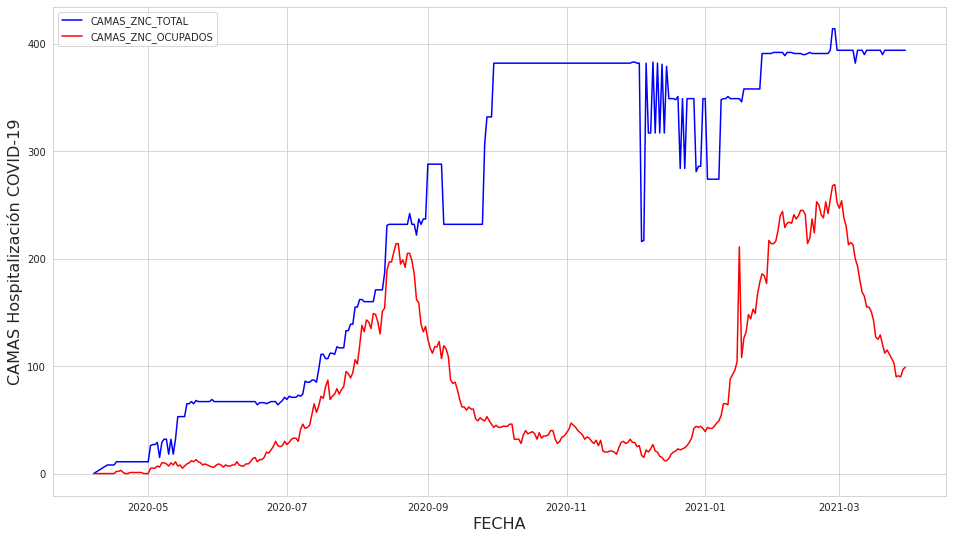

In [38]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.lineplot(data=df_tcq_reg_sin_dup_znc, x=df_tcq_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='CAMAS_ZNC_TOTAL', ax=ax1, color='b')
sns.lineplot(data=df_tcq_reg_sin_dup_znc, x=df_tcq_reg_sin_dup_znc.index, y="CAMAS_ZNC_OCUPADOS", label='CAMAS_ZNC_OCUPADOS',  ax=ax1, color='r')
ax1.set_ylabel('CAMAS Hospitalización COVID-19', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)
plt.savefig('CamasHosp_ZC_Tacna.pdf')
plt.show()


## Camas UCI Adultos (no COVID-19)

In [39]:
df_tcq_reg_sin_dup_ua = df_tacna_region_sin_duplicados.groupby(['FECHA'])['UCI_ADULTOS_CAMAS_OCUPADAS', 'UCI_ADULTOS_CAMAS_TOTAL'].sum()
df_tcq_reg_sin_dup_ua.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_TOTAL
FECHA,,
2021-03-26,7,8
2021-03-27,7,8
2021-03-28,7,8
2021-03-29,7,8
2021-03-30,7,8


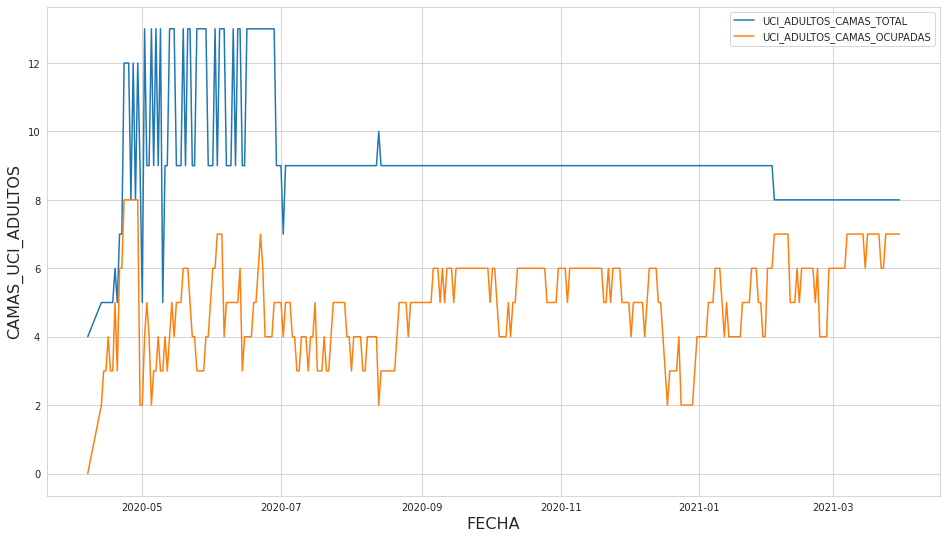

In [40]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_ua, x=df_tcq_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax1)
sns.lineplot(data=df_tcq_reg_sin_dup_ua, x=df_tcq_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_UCI_ADULTOS', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Camas Hospitaliarias Ocupadas

In [41]:
df_tcq_reg_sin_dup_cho = df_tacna_region_sin_duplicados.groupby(['FECHA'])['CAMAS_HOSP_OCUPADAS', 'CAMAS_HOSP_TOTAL'].sum()
df_tcq_reg_sin_dup_cho.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_TOTAL
FECHA,,
2021-03-26,75,335
2021-03-27,74,335
2021-03-28,78,335
2021-03-29,74,347
2021-03-30,86,347


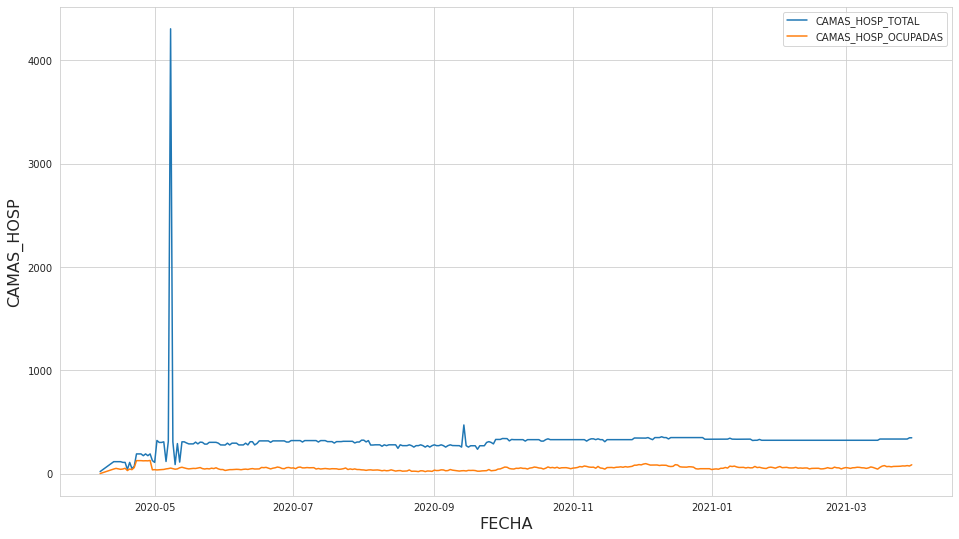

In [42]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_cho, x=df_tcq_reg_sin_dup_cho.index, y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax1)
sns.lineplot(data=df_tcq_reg_sin_dup_cho, x=df_tcq_reg_sin_dup_cho.index, y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_HOSP', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Ventiladores UCI ZC Ocupados

In [43]:
df_tcq_reg_sin_dup_vuzc = df_tacna_region_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_tcq_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-03-26,36,40
2021-03-27,37,40
2021-03-28,36,40
2021-03-29,36,40
2021-03-30,37,40


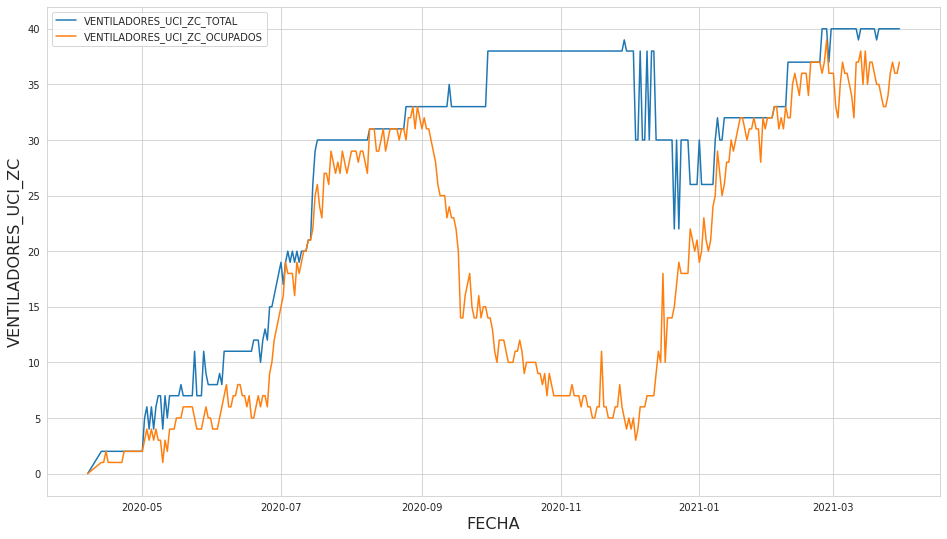

In [44]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_tcq_reg_sin_dup_vuzc, x=df_tcq_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1)
sns.lineplot(data=df_tcq_reg_sin_dup_vuzc, x=df_tcq_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS',  ax=ax1)
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

# Arequipa, Region (v2.0)

In [45]:
# V2.0
df2_arequipa_region = df2[df2['REGION'] == 'AREQUIPA'].sort_values('FECHACORTE')
df2_arequipa_region = df2_arequipa_region[df2_arequipa_region['FECHACORTE'] <= fechaCorte]
df2_arequipa_region.reset_index(inplace=True, drop=True)
df2_arequipa_region.tail()

,FECHACORTE,FECHAREGISTRO,CODIGO,NOMBRE,CATEGORIA,NIVEL,INSTITUCIÓN,GRUPO,SUB_GRUPO,MACROREGIONES,UBIGEO,REGION,PROVINCIA,DISTRITO,RESPONSABLE,CUENTA_TRIAJE,NU_ATENC_ULT,CUENTA_ZC,ZC_UCI_AACT_CAM_TOTAL,ZC_UCI_AACT_CAM_INOPERATIVOS,ZC_UCI_AACT_CAM_TOT_OPER,ZC_UCI_AACT_CAM_TOT_DISP,ZC_UCI_AACT_CAM_TOT_OCUP,ZC_UCI_AACT_COC_CAM_CONFIR,ZC_UCI_AACT_COC_CAM_X_CONFIR,ZC_UCI_AACT_COO_CAM_CANULAS,ZC_UCI_AACT_COO_CAM_SIN_VM,ZC_UCI_AACT_COO_CAM_CON_VM,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_UCI_ADUL_COC_CAM_CONFIR,ZC_UCI_ADUL_COC_CAM_X_CONFIR,ZC_UCI_ADUL_COO_CAM_CANULAS,ZC_UCI_ADUL_COO_CAM_SIN_VM,ZC_UCI_ADUL_COO_CAM_CON_VM,ZC_UCI_NEONATAL_CAM_TOTAL,ZC_UCI_NEONATAL_CAM_INOPERATIVOS,...,ZNC_HOSP_ADUL_CAM_INOPERATIVO,ZNC_HOSP_ADUL_CAM_OPERATIVO,ZNC_HOSP_ADUL_CAM_DISPONIBLE,ZNC_HOSP_ADUL_CAM_OCUPADO,ZNC_HOSP_NEONATAL_CAM_TOTAL,ZNC_HOSP_NEONATAL_CAM_INOPERATIVO,ZNC_HOSP_NEONATAL_CAM_OPERATIVO,ZNC_HOSP_NEONATAL_CAM_DISPONIBLE,ZNC_HOSP_NEONATAL_CAM_OCUPADO,ZNC_HOSP_PEDIA_CAM_TOTAL,ZNC_HOSP_PEDIA_CAM_INOPERATIVO,ZNC_HOSP_PEDIA_CAM_OPERATIVO,ZNC_HOSP_PEDIA_CAM_DISPONIBLE,ZNC_HOSP_PEDIA_CAM_OCUPADO,ZNC_EMER_UTS_CAM_TOTAL,ZNC_EMER_UTS_CAM_INOPERATIVO,ZNC_EMER_UTS_CAM_OPERATIVO,ZNC_EMER_UTS_CAM_DISPONIBLE,ZNC_EMER_UTS_CAM_OCUPADO,ZNC_EMER_UTS_CAM_CON_VM,ZNC_EMER_UTS_CAM_SIN_VM,ZNC_EMER_SOSB_CAM_TOTAL,ZNC_EMER_SOSB_CAM_INOPERATIVO,ZNC_EMER_SOSB_CAM_OPERATIVO,ZNC_EMER_SOSB_CAM_DISPONIBLE,ZNC_EMER_SOSB_CAM_OCUPADO,ZNC_EMER_SOSB_CAM_CON_VM,ZNC_EMER_SOSB_CAM_SIN_VM,ZNC_VENT_CAM_TOTAL,ZNC_VENT_CAM_INOPERATIVO,ZNC_VENT_CAM_OPERATIVO,ZNC_VENT_CAM_DISPONIBLE,ZNC_VENT_CAM_EN_USO,ZNC_MONT_CAM_TOTAL,ZNC_MONT_CAM_INOPERATIVO,ZNC_MONT_CAM_OPERATIVO,ZNC_MONT_CAM_DISPONIBLE,ZNC_MONT_CAM_EN_USO,FECHA,FECHACORTEX
1466,2021-05-28,2021/05/28 5:44:52 PM,11009.0,HOSPITAL I SAMUEL PASTOR DE CAMANA ESSALUD,I-4,Nivel 1,ESSALUD,PÚBLICOS,ESSALUD,Zona Sur,40208.0,AREQUIPA,CAMANA,SAMUEL PASTOR,CESAR EDUARDO CARREÑO DIAZ,NO,NaN,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-28,20210528
1467,2021-05-28,2021/05/28 7:50:09 AM,17588.0,MELO CLINICA DE REPRODUCCION Y GENETICA,II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,Zona Sur,40101.0,AREQUIPA,AREQUIPA,AREQUIPA,ANNIA ANTONIETA SOTO PUMA,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,2021-05-28,20210528
1468,2021-05-28,2021/05/28 5:20:36 PM,27214.0,CLINICA SAN PABLO AREQUIPA,II-2,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,Zona Sur,40104.0,AREQUIPA,AREQUIPA,CERRO COLORADO,JOSE ANTONIO LINAREZ TEJADA,SI,14.0,SI,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,13.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,14.0,0.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,1.0,2021-05-28,20210528
1469,2021-05-28,2021/05/28 6:35:20 PM,1232.0,HOSPITAL GOYENECHE,III-1,Nivel 3,GOBIERNO REGIONAL,PÚBLICOS,MINSA/GR,Zona Sur,40101.0,AREQUIPA,AREQUIPA,AREQUIPA,JUAN LUIS HERRERA CHEJO,SI,70.0,SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,1.0,5.0,1.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,209.0,23.0,186.0,14.0,0.0,14.0,5.0,9.0,32.0,0.0,32.0,18.0,14.0,5.0,0.0,5.0,0.0,5.0,5.0,0.0,19.0,0.0,19.0,3.0,16.0,0.0,16.0,12.0,0.0,12.0,5.0,7.0,23.0,0.0,23.0,0.0,23.0,2021-05-28,20210528
1470,2021-05-28,2021/05/28 6:41:32 PM,12692.0,OFTALMOLOGIA AVANZADA,II-E,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,Zona Sur,40126.0,AREQUIPA,AREQUIPA,YANAHUARA,ALEJANDRA AURELIA BEJARANO FLORES,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,

In [46]:
df2_arequipa_region_sin_duplicados = df2_arequipa_region.drop(['FECHAREGISTRO','FECHA'], 1)
#df2_arequipa_region_sin_duplicados = df2_arequipa_region
df2_arequipa_region_sin_duplicados = df2_arequipa_region_sin_duplicados.drop_duplicates()

In [47]:
df2_arequipa_region_sin_duplicados.NOMBRE.unique()

array(['HOSPITAL GOYENECHE', 'HOSPITAL III YANAHUARA',
       'HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA',
       'CLINICA SAN JUAN DE DIOS', 'CLINICA ALMONTE SAC',
       'CLINICA AREQUIPA S.A.', 'CLINICA PAZ HOLANDESA', 'CEFERGIN',
       'OFTALMOLOGIA AVANZADA', 'HOSPITAL REGIONAL DEL SUR',
       'PRAXIS MEDICAL S.A.C.', 'CLINICA J. PRADO SANTA MARIA E.I.R.L.',
       'HOSPITAL II MANUEL DE TORRES MUÑOZ -  MOLLENDO',
       'HOSPITAL DE CAMANA',
       'HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ESCOBEDO',
       'HOSPITAL REGIONAL PNP AREQUIPA',
       'INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS',
       'HOSPITAL I SAMUEL PASTOR DE CAMANA ESSALUD',
       'MELO CLINICA DE REPRODUCCION Y GENETICA',
       'CLINICA SAN PABLO AREQUIPA',
       'HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS',
       'SISTEMAS DE ADMINISTRACION HOSPITALARIA S.A.C. (SANNA - CLINICA DEL SUR)',
       'HOSPITAL APLAO', 'HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA',
       'CLINICA

In [48]:
# Camas UCI Ocupadas / Operativas
df2_are_reg_sin_dup_zc = df2_arequipa_region_sin_duplicados.groupby(['FECHACORTE'])['ZC_UCI_AACT_CAM_TOT_OPER','ZC_UCI_AACT_CAM_TOT_OCUP','ZC_UCI_ADUL_CAM_TOTAL', 'ZC_UCI_ADUL_CAM_TOT_OPER', 'ZC_UCI_ADUL_CAM_TOT_OCUP','ZC_UCI_ADUL_COC_CAM_CONFIR','ZC_UCI_ADUL_COC_CAM_X_CONFIR','ZC_UCI_ADUL_COO_CAM_CON_VM','ZC_UCI_ADUL_COO_CAM_CANULAS','ZC_UCI_PEDIA_CAM_TOT_OPER','ZC_UCI_PEDIA_CAM_TOT_OCUP','ZC_UCIN_CIA_CAM_TOT_OPER','ZC_UCIN_CIA_CAM_TOT_OCUP','ZC_UCIN_CIA_COC_CAM_CONFIR','ZC_UCIN_CIA_COO_CAM_CANULAS','ZC_UCIN_CIP_CAM_TOT_OPER','ZC_UCIN_CIP_CAM_TOT_OCUP'].sum()
df2_are_reg_sin_dup_zc.to_csv('CamasUCI_ZC_Arequipa.csv')
df2_are_reg_sin_dup_zc.tail(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ZC_UCI_AACT_CAM_TOT_OPER,ZC_UCI_AACT_CAM_TOT_OCUP,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_UCI_ADUL_COC_CAM_CONFIR,ZC_UCI_ADUL_COC_CAM_X_CONFIR,ZC_UCI_ADUL_COO_CAM_CON_VM,ZC_UCI_ADUL_COO_CAM_CANULAS,ZC_UCI_PEDIA_CAM_TOT_OPER,ZC_UCI_PEDIA_CAM_TOT_OCUP,ZC_UCIN_CIA_CAM_TOT_OPER,ZC_UCIN_CIA_CAM_TOT_OCUP,ZC_UCIN_CIA_COC_CAM_CONFIR,ZC_UCIN_CIA_COO_CAM_CANULAS,ZC_UCIN_CIP_CAM_TOT_OPER,ZC_UCIN_CIP_CAM_TOT_OCUP
FECHACORTE,,,,,,,,,,,,,,,,,
2021-05-24,1.0,0.0,127.0,127.0,122.0,117.0,5.0,122.0,0.0,1.0,0.0,31.0,31.0,24.0,12.0,0.0,0.0
2021-05-25,1.0,0.0,126.0,126.0,121.0,117.0,4.0,120.0,0.0,1.0,0.0,31.0,31.0,24.0,10.0,0.0,0.0
2021-05-26,1.0,0.0,116.0,116.0,116.0,111.0,5.0,104.0,8.0,1.0,0.0,31.0,30.0,24.0,12.0,0.0,0.0
2021-05-27,1.0,0.0,127.0,127.0,121.0,117.0,4.0,121.0,0.0,1.0,0.0,31.0,30.0,24.0,12.0,0.0,0.0
2021-05-28,1.0,0.0,127.0,127.0,123.0,119.0,4.0,123.0,0.0,1.0,0.0,31.0,31.0,24.0,12.0,0.0,0.0


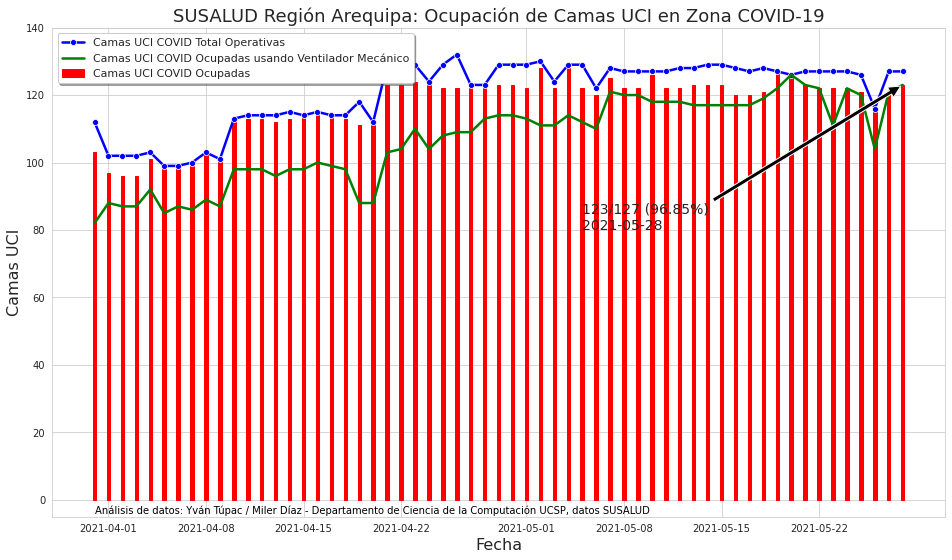

In [49]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

# Add labels to the plot
barWidth = 0.25
ax1.bar(df2_are_reg_sin_dup_zc.index,df2_are_reg_sin_dup_zc['ZC_UCI_ADUL_CAM_TOT_OCUP'],color='r',edgecolor='r',width=barWidth,label='Camas UCI COVID Ocupadas')
sns.lineplot(data=df2_are_reg_sin_dup_zc, x=df2_are_reg_sin_dup_zc.index, y="ZC_UCI_ADUL_CAM_TOT_OPER",  label='Camas UCI COVID Total Operativas', ax=ax1,color='b',linewidth=2.5,marker='o')
#sns.lineplot(data=df2_are_reg_sin_dup_zc, x=df2_are_reg_sin_dup_zc.index, y="ZC_UCI_ADUL_CAM_TOT_OCUP", label='Camas UCI COVID Ocupadas',  ax=ax1,color='r',linewidth=2.5)
sns.lineplot(data=df2_are_reg_sin_dup_zc, x=df2_are_reg_sin_dup_zc.index, y="ZC_UCI_ADUL_COO_CAM_CON_VM", label='Camas UCI COVID Ocupadas usando Ventilador Mecánico',  ax=ax1,color='g',linewidth=2.5)

ax1.legend(fancybox=True, shadow=True, loc='upper left', ncol=1,fontsize=11)
ax1.set_ylabel('Camas UCI', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-5,140)


# Add anottations to the plot
style = dict(size=10, color='k')
'''
ax1.text(pd.to_datetime('2020-03-25'), -3, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de SUSALUD", **style)
ax1.annotate("Pico 1a ola (86/94)\n2020-07-28", xy=(pd.to_datetime('2020-7-28'), 86),  xycoords='data',
            xytext=(pd.to_datetime('2020-6-1'), 90), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Baja ocup (40/70)\n2020-11-29", xy=(pd.to_datetime('2020-11-29'), 40),  xycoords='data',
            xytext=(pd.to_datetime('2020-10-10'), 25), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Ocup 100%\nFeb/13,24,25", xy=(pd.to_datetime('2021-02-25'), 96),  xycoords='data',
            xytext=(pd.to_datetime('2021-1-5'), 98), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Ocup 100%\nFeb/13,24,25", xy=(pd.to_datetime('2021-02-13'), 94),  xycoords='data',
            xytext=(pd.to_datetime('2021-1-5'), 98), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
'''
lastOccupied  = str(int(df2_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_CAM_TOT_OCUP))
lastTotal     = str(int(df2_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_CAM_TOT_OPER))
lastPercent   = str(round(int(df2_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_CAM_TOT_OCUP)/int(df2_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_CAM_TOT_OPER)*100,2))
lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"
ax1.annotate(lastAnnotate + "\n" + fechaCorte, xy=(pd.to_datetime(fechaCorte), df2_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_CAM_TOT_OCUP),  xycoords='data',
            xytext=(pd.to_datetime('2021-05-05'), 80), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)
ax1.text(pd.to_datetime('2021-03-31'), -4, "Análisis de datos: Yván Túpac / Miler Díaz - Departamento de Ciencia de la Computación UCSP, datos SUSALUD", **style)
plt.title('SUSALUD Región Arequipa: Ocupación de Camas UCI en Zona COVID-19',fontsize=18)
plt.savefig('CamasUCI_ZC_Arequipa_2.0.pdf')
plt.show()

In [50]:
df2_are_reg_sin_dup_znc = df2_arequipa_region_sin_duplicados.groupby(['FECHACORTE'])['ZC_HOSP_AHT_CAM_TOT_OPER','ZC_HOSP_AHT_CAM_TOT_OCUP','ZC_HOSP_AHT_COC_CAM_CONFIR','ZC_HOSP_AHT_COO_CAM_CANULAS','ZC_HOSP_ADUL_CAM_TOT_OPER','ZC_HOSP_ADUL_CAM_TOT_OCUP','ZC_HOSP_ADUL_COC_CAM_CONFIR','ZC_HOSP_ADUL_COO_CAM_CANULAS','ZC_EMER_ADUL_CAM_TOT_OPER','ZC_EMER_ADUL_CAM_TOT_OCUP','ZC_EMER_ADUL_COC_CAM_CONFIR','ZC_EMER_ADUL_COO_CAM_CANULAS','ZC_EMER_ADUL_COO_CAM_CON_VM','ZC_HOSP_PEDIA_CAM_TOT_OPER','ZC_HOSP_PEDIA_CAM_TOT_OCUP','ZC_HOSP_PEDIA_COC_CAM_CONFIR','ZC_HOSP_PEDIA_COO_CAM_CANULAS','ZC_AREA_EXP_CAM_TOTAL','ZC_AREA_EXP_COC_CAM_CONFIR','ZC_AREA_EXP_COC_CAM_X_CONFIR'].sum()
df2_are_reg_sin_dup_znc.to_csv('CamasHosp_ZC_Arequipa2.0.csv')
df2_are_reg_sin_dup_znc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ZC_HOSP_AHT_CAM_TOT_OPER,ZC_HOSP_AHT_CAM_TOT_OCUP,ZC_HOSP_AHT_COC_CAM_CONFIR,ZC_HOSP_AHT_COO_CAM_CANULAS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_COC_CAM_CONFIR,ZC_HOSP_ADUL_COO_CAM_CANULAS,ZC_EMER_ADUL_CAM_TOT_OPER,ZC_EMER_ADUL_CAM_TOT_OCUP,ZC_EMER_ADUL_COC_CAM_CONFIR,ZC_EMER_ADUL_COO_CAM_CANULAS,ZC_EMER_ADUL_COO_CAM_CON_VM,ZC_HOSP_PEDIA_CAM_TOT_OPER,ZC_HOSP_PEDIA_CAM_TOT_OCUP,ZC_HOSP_PEDIA_COC_CAM_CONFIR,ZC_HOSP_PEDIA_COO_CAM_CANULAS,ZC_AREA_EXP_CAM_TOTAL,ZC_AREA_EXP_COC_CAM_CONFIR,ZC_AREA_EXP_COC_CAM_X_CONFIR
FECHACORTE,,,,,,,,,,,,,,,,,,,,
2021-05-24,242.0,156.0,155.0,0.0,1079.0,878.0,878.0,76.0,22.0,15.0,14.0,1.0,14.0,8.0,3.0,3.0,0.0,29.0,17.0,12.0
2021-05-25,242.0,155.0,155.0,0.0,1075.0,874.0,874.0,82.0,22.0,16.0,15.0,2.0,14.0,8.0,3.0,3.0,0.0,33.0,22.0,11.0
2021-05-26,242.0,163.0,163.0,0.0,1109.0,881.0,881.0,79.0,22.0,17.0,16.0,1.0,14.0,8.0,2.0,2.0,0.0,33.0,22.0,11.0
2021-05-27,248.0,142.0,142.0,0.0,1079.0,897.0,897.0,75.0,26.0,19.0,18.0,1.0,16.0,8.0,3.0,3.0,0.0,32.0,22.0,10.0
2021-05-28,248.0,161.0,161.0,0.0,1091.0,901.0,901.0,79.0,28.0,22.0,21.0,2.0,16.0,8.0,0.0,0.0,0.0,33.0,22.0,11.0


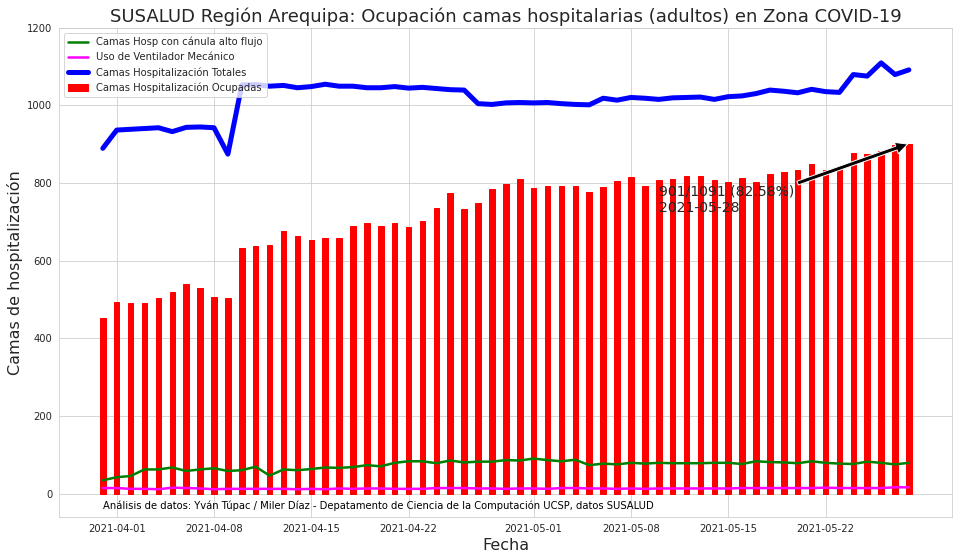

In [51]:
# Camas hospitalares 

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.40
ax1.bar(df2_are_reg_sin_dup_znc.index,df2_are_reg_sin_dup_znc['ZC_HOSP_ADUL_CAM_TOT_OCUP'],color='r',edgecolor='r',width=barWidth,label='Camas Hospitalización Ocupadas')
sns.lineplot(data=df2_are_reg_sin_dup_znc, x=df2_are_reg_sin_dup_znc.index, y="ZC_HOSP_ADUL_COO_CAM_CANULAS", label='Camas Hosp con cánula alto flujo',  ax=ax1,color='g',linewidth=2.5)
sns.lineplot(data=df2_are_reg_sin_dup_znc, x=df2_are_reg_sin_dup_znc.index, y="ZC_EMER_ADUL_COO_CAM_CON_VM", label='Uso de Ventilador Mecánico',  ax=ax1,color='magenta',linewidth=2.5)
sns.lineplot(data=df2_are_reg_sin_dup_znc, x=df2_are_reg_sin_dup_znc.index, y="ZC_HOSP_ADUL_CAM_TOT_OPER",  label='Camas Hospitalización Totales', ax=ax1,color='b',linewidth=5.0)
#sns.lineplot(data=df2_are_reg_sin_dup_znc, x=df2_are_reg_sin_dup_znc.index, y="ZC_HOSP_ADUL_CAM_TOT_OCUP", label='Camas Hospitalización Ocupadas',  ax=ax1, color='r',linewidth=2.5)
ax1.set_ylabel('Camas de hospitalización', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-60,1200)
style = dict(size=10, color='k')
'''
ax1.annotate("Pico 1a ola (908/1015)\n2020-08-06", xy=(pd.to_datetime('2020-08-06'), 908),  xycoords='data',
            xytext=(pd.to_datetime('2020-07-01'), 1100), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Baja ocup (201/1258)\n2020-11-19", xy=(pd.to_datetime('2020-11-19'), 201),  xycoords='data',
            xytext=(pd.to_datetime('2020-10-25'), 50), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Pico 2a ola (726/1046)\n2021-02-06", xy=(pd.to_datetime('2021-02-06'), 726),  xycoords='data',
            xytext=(pd.to_datetime('2020-12-05'), 800), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
#ax1.annotate("533/1152 (46.27%)\n2021/Mar/19", xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS),  xycoords='data',
#            xytext=(pd.to_datetime('2021-01-25'), 340), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)
'''
lastOccupied  = str(int(df2_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_CAM_TOT_OCUP))
lastTotal     = str(int(df2_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_CAM_TOT_OPER))
lastPercent   = str(round(int(df2_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_CAM_TOT_OCUP)/int(df2_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_CAM_TOT_OPER)*100,2))
lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"

ax1.annotate(lastAnnotate + "\n" + fechaCorte, xy=(pd.to_datetime(fechaCorte), df2_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_CAM_TOT_OCUP),  xycoords='data',
            xytext=(pd.to_datetime('2021-05-10'), df2_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_CAM_TOT_OCUP -175), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)
ax1.text(pd.to_datetime('2021-03-31'), -40, "Análisis de datos: Yván Túpac / Miler Díaz - Depatamento de Ciencia de la Computación UCSP, datos SUSALUD", **style)

plt.title('SUSALUD Región Arequipa: Ocupación camas hospitalarias (adultos) en Zona COVID-19',fontsize=18)
plt.savefig('CamasHosp_ZC_Arequipa_2.0.pdf')
plt.show()

# Arequipa Región v1.0

In [52]:
df_arequipa_region = df[df['REGION'] == 'AREQUIPA'].sort_values('FECHA')
df_arequipa_region = df_arequipa_region[df_arequipa_region['FECHA'] <= fechaCorte]
df_arequipa_region.reset_index(inplace=True, drop=True)
df_arequipa_region.tail()

,CORRELATIVO,FECHA_CORTE,FECHA_REGISTRO,INSTITUCION,UBIGEO,REGION,PROVINCIA,CATEGORIA,CODIGO,NOMBRE,ZONA_COVID,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_DISPONIBLE,CAMAS_ZNC_TOTAL,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_DISPONIBLE,UCI_ADULTOS_CAMAS_TOTAL,UCI_PEDIATRIA_CAMAS_OCUPADAS,UCI_PEDIATRIA_CAMAS_DISPONIBLE,UCI_PEDIATRIA_CAMAS_TOTAL,UCIN_CAMAS_OCUPADAS,UCIN_CAMAS_DISPONIBLE,UCIN_CAMAS_TOTAL,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_DISPONIBLE,CAMAS_HOSP_TOTAL,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_DISPONIBLE,VENTILADORES_UCI_ZC_TOTAL,VENTILADORES_UCI_ADULTO_OCUPADOS,VENTILADORES_UCI_ADULTO_DISPONIBLE,VENTILADORES_UCI_ADULTO_TOTAL,VENTILADORES_UCI_PEDIATRIA_OCUPADOS,VENTILADORES_UCI_PEDIATRIA_DISPONIBLE,VENTILADORES_UCI_PEDIATRIA_TOTAL,VENTILADORES_UCIN_OCUPADOS,VENTILADORES_UCIN_DISPONIBLE,VENTILADORES_UCIN_TOTAL,FECHA,TOTAL_CAMAS_UCI,TOTAL_CAMAS,TOTAL_CAMAS_DISPONIBLES,TOTAL_CAMAS_OCUPADAS
9385,188906,20210330,20210330,FFAA y PNP,40109.0,AREQUIPA,AREQUIPA,II-1,18659,HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA,Si,0,0,0,0,10,10,0,0,0,0,0,0,0,0,0,12,27,39,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,49,37,12
9386,188910,20210330,20210330,Privado,40112.0,AREQUIPA,AREQUIPA,II-E,16064,CLINICA PAZ HOLANDESA,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,21,35,0,0,0,0,0,0,0,0,0,0,0,0,2021-03-30,0,35,21,14
9387,189034,20210331,20210330,Privado,40103.0,AREQUIPA,AREQUIPA,II-1,15730,CLINICA SAN JUAN DE DIOS,No,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,41,13,54,0,0,0,4,0,4,0,0,0,0,0,0,2021-03-30,4,58,13,45
9388,188675,20210330,20210330,Gob Regional,40101.0,AREQUIPA,AREQUIPA,III-2,7397,INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS,Si,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,32,7,39,0,0,0,1,0,1,0,1,1,0,0,0,2021-03-30,2,41,7,34
9389,188455,20210330,20210330,Privado,40101.0,AREQUIPA,AREQUIPA,II-1,16744,CLINICA VALLESUR,Si,4,0,4,6,3,9,1,1,2,0,0,0,0,0,0,18,6,24,4,0,4,1,1,2,0,0,0,0,0,0,2021-03-30,6,39,10,29


In [53]:
df_arequipa_region_sin_duplicados = df_arequipa_region.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_arequipa_region_sin_duplicados = df_arequipa_region_sin_duplicados.drop_duplicates()

In [54]:
df_arequipa_region_sin_duplicados.NOMBRE.unique()

array(['CLINICA SAN JUAN DE DIOS', 'CLINICA VALLESUR',
       'CLINICA AREQUIPA S.A.',
       'SISTEMAS DE ADMINISTRACION HOSPITALARIA S.A.C. (SANNA - CLINICA DEL SUR)',
       'CLINICA SAN PABLO AREQUIPA',
       'CLINICA J. PRADO SANTA MARIA E.I.R.L.', 'CLINICA ALMONTE SAC',
       'HOSPITAL GOYENECHE', 'HOSPITAL III YANAHUARA',
       'HOSPITAL REGIONAL DEL SUR',
       'HOSPITAL I SAMUEL PASTOR DE CAMANA ESSALUD',
       'HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ESCOBEDO',
       'HOSPITAL I EDMUNDO ESCOMEL',
       'HOSPITAL II MANUEL DE TORRES MUÑOZ -  MOLLENDO',
       'INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS', 'HOSPITAL APLAO',
       'HOSPITAL REGIONAL PNP AREQUIPA', 'POSTA MEDICA CHALA',
       'MELO CLINICA DE REPRODUCCION Y GENETICA',
       'HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS',
       'CLINICA ALIVIARI', 'HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA',
       'HOSPITAL DE CAMANA', 'PRAXIS MEDICAL S.A.C.', 'CEFERGIN',
       'HOSPITAL MILIT

## Camas ZC (UCI en Zona COVID-19)

In [55]:
df_are_reg_sin_dup_zc = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_TOTAL'].sum()
df_are_reg_sin_dup_zc.to_csv('CamasUCI_ZC_Arequipa.csv')
df_are_reg_sin_dup_zc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,
2021-03-26,88,98
2021-03-27,87,96
2021-03-28,80,91
2021-03-29,83,89
2021-03-30,85,91


In [56]:
# append
#df2_are_reg_sin_dup_zc = df2_arequipa_region_sin_duplicados.groupby(['FECHA'])['ZC_UCI_ADUL_CAM_TOTAL', 'ZC_UCI_ADUL_CAM_TOT_OPER', 'ZC_UCI_ADUL_CAM_TOT_OCUP',
#                                                                               'ZC_UCI_ADUL_COC_CAM_CONFIR','ZC_UCI_ADUL_COC_CAM_X_CONFIR',
#                                                                               'ZC_UCI_ADUL_COO_CAM_CON_VM','ZC_UCI_PEDIA_CAM_TOT_OPER','ZC_UCI_PEDIA_CAM_TOT_OCUP'].sum()
dfUCITemp = df2_are_reg_sin_dup_zc
dfUCITemp['CAMAS_ZC_TOTAL'] = df2_are_reg_sin_dup_zc['ZC_UCI_ADUL_CAM_TOT_OPER'].astype(int)
dfUCITemp['CAMAS_ZC_OCUPADOS'] = df2_are_reg_sin_dup_zc['ZC_UCI_ADUL_CAM_TOT_OCUP'].astype(int)
dfUCITemp = dfUCITemp.drop(['ZC_UCI_ADUL_CAM_TOTAL', 'ZC_UCI_ADUL_CAM_TOT_OPER', 'ZC_UCI_ADUL_CAM_TOT_OCUP'],1)
df_are_reg_sin_dup_zc = df_are_reg_sin_dup_zc.append(dfUCITemp)



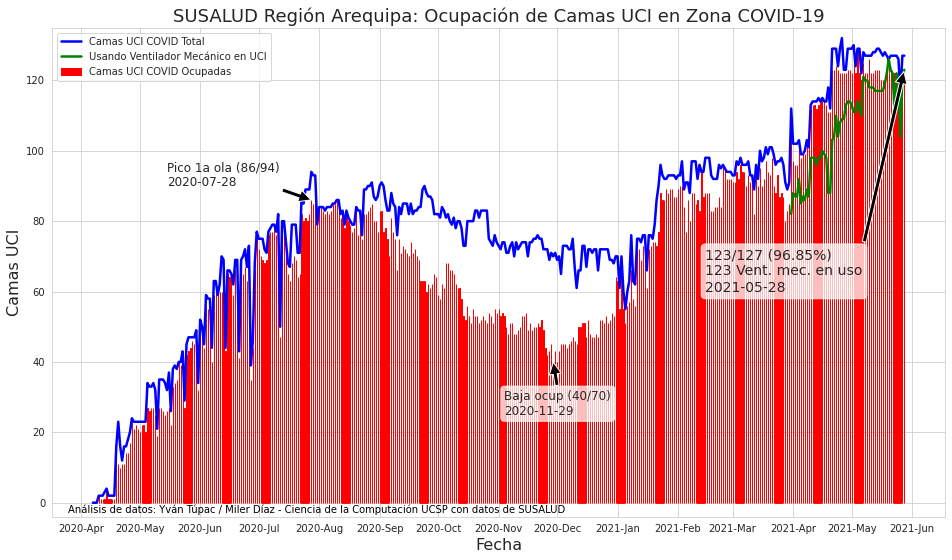

In [57]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.10
# Add labels to the plot
ax1.bar(df_are_reg_sin_dup_zc.index,df_are_reg_sin_dup_zc['CAMAS_ZC_OCUPADOS'],color='r',edgecolor='r',width=barWidth,label='Camas UCI COVID Ocupadas')
sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='Camas UCI COVID Total', ax=ax1,color='b',linewidth=2.5)
sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="ZC_UCI_ADUL_COO_CAM_CON_VM", label='Usando Ventilador Mecánico en UCI',  ax=ax1,color='g',linewidth=2.5)
ax1.set_ylabel('Camas UCI', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-4,135)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
date_form = DateFormatter("%Y-%b")
ax1.xaxis.set_major_formatter(date_form)
# Add anottations to the plot
style = dict(size=10, color='k')
bbox = dict(boxstyle='round', fc='1.0',alpha=0.75)
ax1.text(pd.to_datetime('2020-03-25'), -3, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de SUSALUD", **style)
ax1.annotate("Pico 1a ola (86/94)\n2020-07-28", xy=(pd.to_datetime('2020-7-28'), 86),  xycoords='data',
            xytext=(pd.to_datetime('2020-05-15'), 90), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Baja ocup (40/70)\n2020-11-29", xy=(pd.to_datetime('2020-11-29'), 40),  xycoords='data',
            xytext=(pd.to_datetime('2020-11-04'), 25), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12,bbox=bbox)
lastOccupied  = str(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS))
lastTotal     = str(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL))
lastPercent   = str(round(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS)/int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL)*100,2))
lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"
lastVM        = str(int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_COO_CAM_CON_VM)) + " Vent. mec. en uso"
ax1.annotate(lastAnnotate + "\n" + lastVM + '\n' + fechaCorte, xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS),  xycoords='data',
            xytext=(pd.to_datetime('2021-02-15'), 60), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14,bbox=bbox)

plt.title('SUSALUD Región Arequipa: Ocupación de Camas UCI en Zona COVID-19',fontsize=18)
plt.savefig('SUSALUD_Arequipa_UCI_ZC.pdf')
plt.show()

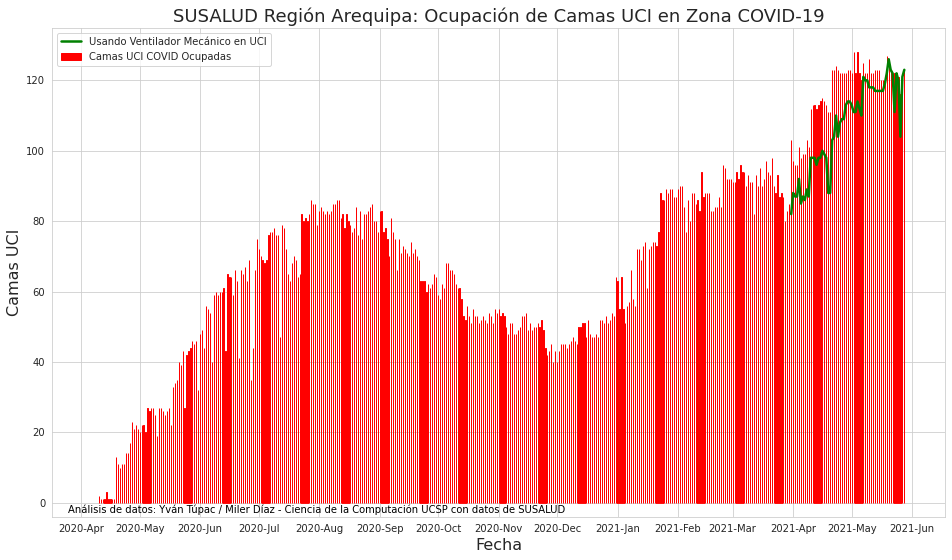

In [58]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.10
# Add labels to the plot
ax1.bar(df_are_reg_sin_dup_zc.index,df_are_reg_sin_dup_zc['CAMAS_ZC_OCUPADOS'],color='r',edgecolor='r',width=barWidth,label='Camas UCI COVID Ocupadas')
sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="ZC_UCI_ADUL_COO_CAM_CON_VM", label='Usando Ventilador Mecánico en UCI',  ax=ax1,color='g',linewidth=2.5)
#sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="CAMAS_ZC_TOTAL",  label='Camas UCI COVID Total', ax=ax1,color='b',linewidth=2.5)

ax1.set_ylabel('Camas UCI', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-4,135)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
date_form = DateFormatter("%Y-%b")
ax1.xaxis.set_major_formatter(date_form)
# Add anottations to the plot
style = dict(size=10, color='k')
bbox = dict(boxstyle='round', fc='1.0')
ax1.text(pd.to_datetime('2020-03-25'), -3, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de SUSALUD", **style)
#ax1.annotate("Pico 1a ola (86/94)\n2020-07-28", xy=(pd.to_datetime('2020-7-28'), 86),  xycoords='data',
#            xytext=(pd.to_datetime('2020-6-1'), 90), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
#ax1.annotate("Baja ocup (40/70)\n2020-11-29", xy=(pd.to_datetime('2020-11-29'), 40),  xycoords='data',
#            xytext=(pd.to_datetime('2020-11-5'), 25), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12,bbox=bbox)
#lastOccupied  = str(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS))
#lastTotal     = str(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL))
#lastPercent   = str(round(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS)/int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL)*100,2))
#lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"
#ax1.annotate(lastAnnotate + "\n" + fechaCorte, xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS),  xycoords='data',
#            xytext=(pd.to_datetime('2021-02-12'), 70), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14,bbox=bbox)

plt.title('SUSALUD Región Arequipa: Ocupación de Camas UCI en Zona COVID-19',fontsize=18)
plt.savefig('SUSALUD_Arequipa_UCI_ZC_video.pdf')
plt.show()

## Camas ZC (Camas de cuidados intermedios, hospitalización, emergencia, atención temporal, expansión COVID-19)

In [59]:
df_are_reg_sin_dup_znc = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['CAMAS_ZNC_OCUPADOS', 'CAMAS_ZNC_TOTAL'].sum()
df_are_reg_sin_dup_znc.to_csv('CamasHosp_ZC_Arequipa.csv')
df_are_reg_sin_dup_znc.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZNC_OCUPADOS,CAMAS_ZNC_TOTAL
FECHA,,
2021-03-26,519,1120
2021-03-27,535,1035
2021-03-28,518,1037
2021-03-29,511,1112
2021-03-30,554,1108


In [60]:
# append
#df2_are_reg_sin_dup_znc = df2_arequipa_region_sin_duplicados.groupby(['FECHA'])['ZC_UCIN_CIA_CAM_TOTAL','ZC_UCIN_CIA_CAM_TOT_OPER',
#                                                                                'ZC_UCIN_CIA_CAM_TOT_OCUP','ZC_UCIN_CIA_COC_CAM_CONFIR',
#                                                                                'ZC_HOSP_AHT_CAM_TOT_OPER','ZC_HOSP_AHT_CAM_TOT_OCUP',
#                                                                                'ZC_HOSP_ADUL_CAM_TOT_OPER','ZC_HOSP_ADUL_CAM_TOT_OCUP',
#                                                                                'ZC_HOSP_ADUL_COC_CAM_CONFIR','ZC_EMER_ADUL_COO_CAM_CON_VM',
#                                                                                'ZC_HOSP_PEDIA_CAM_TOT_OPER','ZC_HOSP_PEDIA_CAM_TOT_OCUP'].sum()
dfUCINTemp = df2_are_reg_sin_dup_znc
dfUCINTemp['CAMAS_ZNC_TOTAL'] = df2_are_reg_sin_dup_znc['ZC_HOSP_ADUL_CAM_TOT_OPER'].astype(int)
dfUCINTemp['CAMAS_ZNC_OCUPADOS'] = df2_are_reg_sin_dup_znc['ZC_HOSP_ADUL_CAM_TOT_OCUP'].astype(int)
#dfUCINTemp = dfUCINTemp.drop(['ZC_UCIN_CIA_CAM_TOTAL','ZC_UCIN_CIA_CAM_TOT_OPER',
#                             'ZC_UCIN_CIA_CAM_TOT_OCUP','ZC_UCIN_CIA_COC_CAM_CONFIR',
#                             'ZC_HOSP_AHT_CAM_TOT_OPER','ZC_HOSP_AHT_CAM_TOT_OCUP',
#                             'ZC_HOSP_ADUL_CAM_TOT_OPER','ZC_HOSP_ADUL_CAM_TOT_OCUP'],1)
df_are_reg_sin_dup_znc = df_are_reg_sin_dup_znc.append(dfUCINTemp)


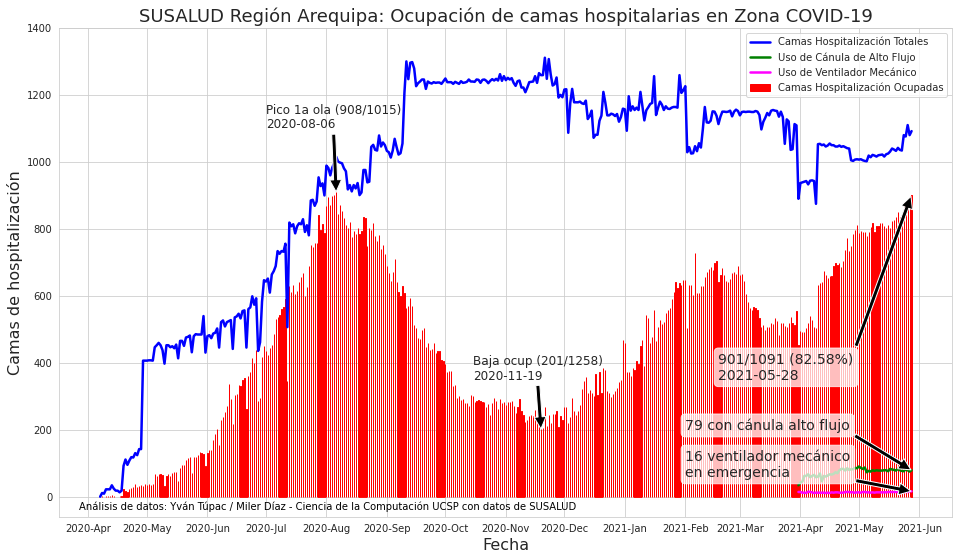

In [61]:
df_are_reg_sin_dup_znc.to_excel('SUSALUD_Arequipa_CamasHospitalarias.xls')
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
barWidth = 0.10
ax1.bar(df_are_reg_sin_dup_znc.index,df_are_reg_sin_dup_znc['CAMAS_ZNC_OCUPADOS'],color='r',edgecolor='r',width=barWidth,label='Camas Hospitalización Ocupadas')
sns.lineplot(data=df_are_reg_sin_dup_znc, x=df_are_reg_sin_dup_znc.index, y="CAMAS_ZNC_TOTAL",  label='Camas Hospitalización Totales', ax=ax1,color='b',linewidth=2.5)
sns.lineplot(data=df_are_reg_sin_dup_znc, x=df_are_reg_sin_dup_znc.index, y="ZC_HOSP_ADUL_COO_CAM_CANULAS", label='Uso de Cánula de Alto Flujo',  ax=ax1,color='g',linewidth=2.5)
sns.lineplot(data=df2_are_reg_sin_dup_znc, x=df2_are_reg_sin_dup_znc.index, y="ZC_EMER_ADUL_COO_CAM_CON_VM", label='Uso de Ventilador Mecánico',  ax=ax1,color='magenta',linewidth=2.5)

ax1.set_ylabel('Camas de hospitalización', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=16)
ax1.set_ylim(-60,1400)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
date_form = DateFormatter("%Y-%b")
ax1.xaxis.set_major_formatter(date_form)

style = dict(size=10, color='k')
bbox = dict(boxstyle='round', fc='1.0',alpha=0.75)
ax1.annotate("Pico 1a ola (908/1015)\n2020-08-06", xy=(pd.to_datetime('2020-08-06'), 908),  xycoords='data',
            xytext=(pd.to_datetime('2020-07-01'), 1100), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
ax1.annotate("Baja ocup (201/1258)\n2020-11-19", xy=(pd.to_datetime('2020-11-19'), 201),  xycoords='data',
            xytext=(pd.to_datetime('2020-10-15'), 350), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
#ax1.annotate("Pico 2a ola (726/1046)\n2021-02-06", xy=(pd.to_datetime('2021-02-06'), 726),  xycoords='data',
#            xytext=(pd.to_datetime('2020-11-20'), 700), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=12)
#ax1.annotate("533/1152 (46.27%)\n2021/Mar/19", xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS),  xycoords='data',
#            xytext=(pd.to_datetime('2021-01-25'), 340), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14)

lastOccupied  = str(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS))
lastTotal     = str(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL))
lastPercent   = str(round(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS)/int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL)*100,2))
lastAnnotate  = str(lastOccupied)+ '/' + lastTotal + " (" + lastPercent  + "%)"
lastCanula    = str(int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_COO_CAM_CANULAS))
lastVMEmerg   = str(int(df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_COO_CAM_CON_VM))
ax1.annotate(lastAnnotate + "\n" + fechaCorte, xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS),  xycoords='data',
            xytext=(pd.to_datetime('2021-02-18'), 350), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14,bbox=bbox)
ax1.annotate(lastCanula + " con cánula alto flujo", xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_COO_CAM_CANULAS),  xycoords='data',
            xytext=(pd.to_datetime('2021-02-1'), 200), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14,bbox=bbox)
ax1.annotate(lastVMEmerg + " ventilador mecánico\nen emergencia", xy=(pd.to_datetime(fechaCorte), df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_COO_CAM_CON_VM),  xycoords='data',
            xytext=(pd.to_datetime('2021-02-1'), 60), textcoords='data',arrowprops=dict(facecolor='black', shrink=0.01),fontsize=14,bbox=bbox)


ax1.text(pd.to_datetime('2020-03-27'), -40, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de SUSALUD", **style)

plt.title('SUSALUD Región Arequipa: Ocupación de camas hospitalarias en Zona COVID-19',fontsize=18)
plt.savefig('SUSALUD_Arequipa_CamasHosp_ZC.pdf')
plt.show()


In [62]:
# Resumen de ocupación de camas
print('Ocupación camas zona COVID-19 Arequipa ', fechaCorte,'\n')
print('Camas Hospitalarias:')
print('Adulto ocupadas          : ',int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS))
print('Adulto total camas       : ',int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL))
print('Porcentaje de uso        : ',round(int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS)/int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL)*100,2), '%')
print('Con cánula de alto flujo : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_COO_CAM_CANULAS))
print('Vent. mecánico (en emergencia) : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_COO_CAM_CON_VM))
print('Pediatría total          : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_CAM_TOT_OPER))
print('Pediatría ocupadas       : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_CAM_TOT_OCUP),'\n')

print('Camas UCI:')
print('Ocupadas    : ',int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS))
print('Total camas : ',int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL))
print('Porc Uso    : ',round(int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS)/int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL)*100,2), '%')
print('Ventilador mecánico (en UCI): ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_COO_CAM_CON_VM))


Ocupación camas zona COVID-19 Arequipa  2021-05-28 

Camas Hospitalarias:
Adulto ocupadas          :  901
Adulto total camas       :  1091
Porcentaje de uso        :  82.58 %
Con cánula de alto flujo :  79
Vent. mecánico (en emergencia) :  16
Pediatría total          :  8
Pediatría ocupadas       :  0 

Camas UCI:
Ocupadas    :  123
Total camas :  127
Porc Uso    :  96.85 %
Ventilador mecánico (en UCI):  123


In [63]:
print('\nOcupación camas zona COVID-19 Arequipa ', fechaCorte,'\n')
print('UCI Atención temporal')
print('Operativas    : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_AACT_CAM_TOT_OPER))
print('Ocupadas      : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_AACT_CAM_TOT_OCUP))
print('\nUCI Adultos')
print('Operativas    : ',int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_TOTAL))
print('Ocupadas      : ',int(df_are_reg_sin_dup_zc.tail(1).CAMAS_ZC_OCUPADOS))
print('Confirmado COVID-19     : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_COC_CAM_CONFIR))
print('Con ventilador mecánico : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_COO_CAM_CON_VM))
print('Con cánula alto flujo   : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_ADUL_COO_CAM_CANULAS))
print('\nUCI Pedriatría')
print('Operativas    : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_PEDIA_CAM_TOT_OPER))
print('Ocupadas      : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCI_PEDIA_CAM_TOT_OCUP))
print('\nCuidados Intermedios')
print('Operativas    : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCIN_CIA_CAM_TOT_OPER))
print('Ocupadas      : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCIN_CIA_CAM_TOT_OCUP))
print('Con cánula alto flujo   : ',int(df_are_reg_sin_dup_zc.tail(1).ZC_UCIN_CIA_COO_CAM_CANULAS))
print('\nAmbiente de hospitalización temporal')
print('Operativas    : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_AHT_CAM_TOT_OPER))
print('Ocupadas      : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_AHT_CAM_TOT_OCUP))
print('Confirmado COVID-19     : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_AHT_COC_CAM_CONFIR))
print('Con cánula alto flujo   : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_AHT_COO_CAM_CANULAS))
print('\nHospitalización adultos')
print('Operativas    : ',int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_TOTAL))
print('Ocupadas      : ',int(df_are_reg_sin_dup_znc.tail(1).CAMAS_ZNC_OCUPADOS))
print('Confirmado COVID-19     : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_COC_CAM_CONFIR))
print('Con cánula alto flujo   : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_ADUL_COO_CAM_CANULAS))
print('\nHospitalización pediátrica')
print('Operativas    : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_CAM_TOT_OPER))
print('Ocupadas      : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_CAM_TOT_OCUP))
print('Confirmado COVID-19     : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_COC_CAM_CONFIR))
print('Con cánula alto flujo   : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_COO_CAM_CANULAS))
print('\nCamas de atención Emergencia')
print('Operativas    : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_CAM_TOT_OPER))
print('Ocupadas      : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_CAM_TOT_OCUP))
print('Confirmado COVID-19     : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_COO_CAM_CANULAS))
print('Con cánula alto flujo   : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_HOSP_PEDIA_COO_CAM_CANULAS))
print('Con ventilador mecánico : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_EMER_ADUL_COO_CAM_CON_VM))
print('\nÁrea de expansión')
print('Total         : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_AREA_EXP_CAM_TOTAL))
print('Confirmado COVID-19     : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_AREA_EXP_COC_CAM_CONFIR))
print('Por confirmar           : ',int(df_are_reg_sin_dup_znc.tail(1).ZC_AREA_EXP_COC_CAM_X_CONFIR))


Ocupación camas zona COVID-19 Arequipa  2021-05-28 

UCI Atención temporal
Operativas    :  1
Ocupadas      :  0

UCI Adultos
Operativas    :  127
Ocupadas      :  123
Confirmado COVID-19     :  119
Con ventilador mecánico :  123
Con cánula alto flujo   :  0

UCI Pedriatría
Operativas    :  1
Ocupadas      :  0

Cuidados Intermedios
Operativas    :  31
Ocupadas      :  31
Con cánula alto flujo   :  12

Ambiente de hospitalización temporal
Operativas    :  248
Ocupadas      :  161
Confirmado COVID-19     :  161
Con cánula alto flujo   :  0

Hospitalización adultos
Operativas    :  1091
Ocupadas      :  901
Confirmado COVID-19     :  901
Con cánula alto flujo   :  79

Hospitalización pediátrica
Operativas    :  8
Ocupadas      :  0
Confirmado COVID-19     :  0
Con cánula alto flujo   :  0

Camas de atención Emergencia
Operativas    :  28
Ocupadas      :  22
Confirmado COVID-19     :  2
Con cánula alto flujo   :  0
Con ventilador mecánico :  16

Área de expansión
Total         :  33
Conf

# Arequipa por Hospitales

## v1.0

In [64]:
df_arequipa_provincia = df[df['PROVINCIA'] == 'AREQUIPA'].sort_values('FECHA')
df_arequipa_provincia.reset_index(inplace=True, drop=True)

In [65]:
df_arequipa_provincia_sin_duplicados = df_arequipa_provincia.drop(['CORRELATIVO', 'FECHA_CORTE'], 1)
df_arequipa_provincia_sin_duplicados = df_arequipa_provincia_sin_duplicados.drop_duplicates()

In [66]:
df_arequipa_provincia_sin_duplicados.NOMBRE.unique()

array(['CLINICA SAN JUAN DE DIOS', 'CLINICA VALLESUR',
       'CLINICA AREQUIPA S.A.',
       'SISTEMAS DE ADMINISTRACION HOSPITALARIA S.A.C. (SANNA - CLINICA DEL SUR)',
       'CLINICA SAN PABLO AREQUIPA',
       'CLINICA J. PRADO SANTA MARIA E.I.R.L.', 'CLINICA ALMONTE SAC',
       'HOSPITAL GOYENECHE', 'HOSPITAL III YANAHUARA',
       'HOSPITAL REGIONAL DEL SUR',
       'HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ESCOBEDO',
       'HOSPITAL I EDMUNDO ESCOMEL',
       'INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS',
       'HOSPITAL REGIONAL PNP AREQUIPA',
       'MELO CLINICA DE REPRODUCCION Y GENETICA', 'CLINICA ALIVIARI',
       'HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA',
       'PRAXIS MEDICAL S.A.C.', 'CEFERGIN',
       'HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA',
       'CLINICA PAZ HOLANDESA', 'OFTALMOLOGIA AVANZADA'], dtype=object)

## Dividido por Instituciones

In [67]:
def subplot(institucion):
    df_institucion = df_arequipa_provincia_sin_duplicados[df_arequipa_provincia_sin_duplicados['NOMBRE'] == institucion]

    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_TOTAL",  label='Camas UCI Totales', ax=ax1,color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas', ax=ax1,color='r')
    ax1.set_ylabel('Camas UCI COVID-19', fontsize=14)
    ax1.set_xlabel('Fecha', fontsize=16)

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_TOTAL",  label='Camas Hosp Totales', ax=ax2, color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_OCUPADOS", label='Camas Hosp Ocupadas',  ax=ax2, color='r')
    ax2.set_ylabel('Camas Hospitalarias COVID-19', fontsize=14)
    ax2.set_xlabel('Fecha', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax3)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax3)
    #ax3.set_ylabel('UCI_ADULTOS_CAMAS', fontsize=16)
    #ax3.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_PEDIATRIA_CAMAS_TOTAL",  label='UCI_PEDIATRIA_CAMAS_TOTAL', ax=ax4)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_PEDIATRIA_CAMAS_OCUPADAS", label='UCI_PEDIATRIA_CAMAS_OCUPADAS',  ax=ax4)
    #ax4.set_ylabel('UCI_PEDIATRIA_CAMAS', fontsize=16)
    #ax4.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCIN_CAMAS_TOTAL",  label='UCIN_CAMAS_TOTAL', ax=ax5)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCIN_CAMAS_OCUPADAS", label='UCIN_CAMAS_OCUPADAS',  ax=ax5)
    #ax5.set_ylabel('UCIN_CAMAS', fontsize=16)
    #ax5.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax6)
    #sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax6)
    #ax6.set_ylabel('CAMAS_HOSP', fontsize=16)
    #ax6.set_xlabel('FECHA', fontsize=16)

    plt.suptitle(institucion, fontsize=20)
    plt.show()

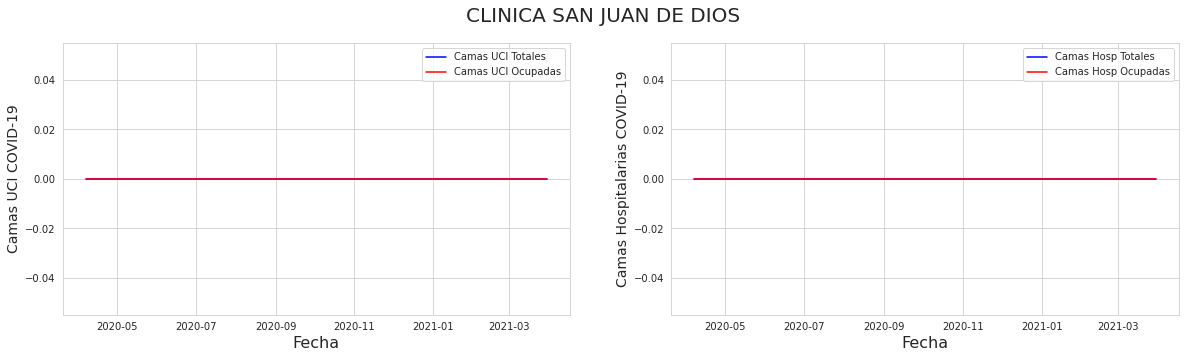

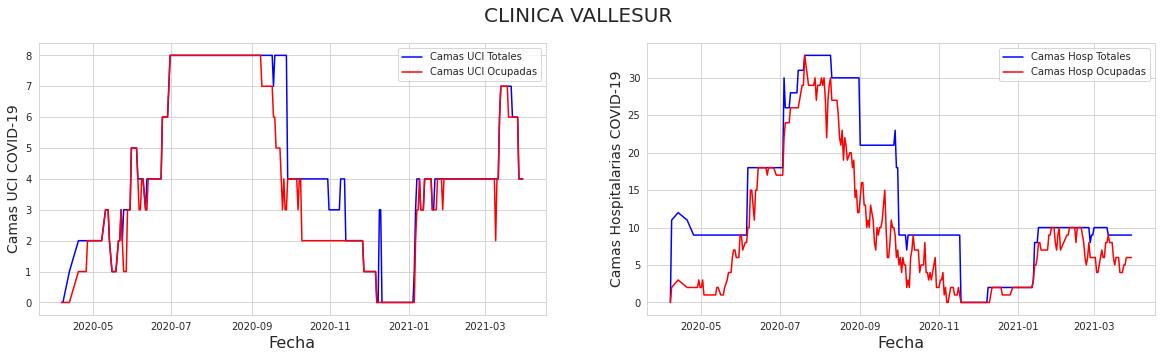

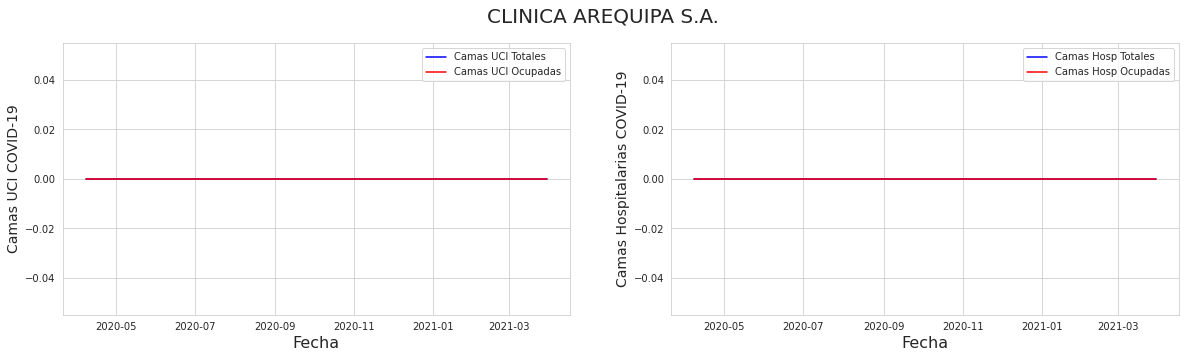

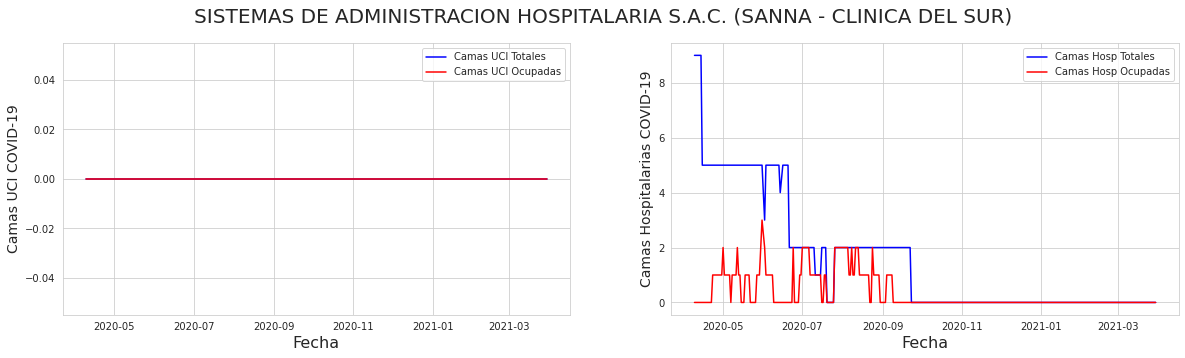

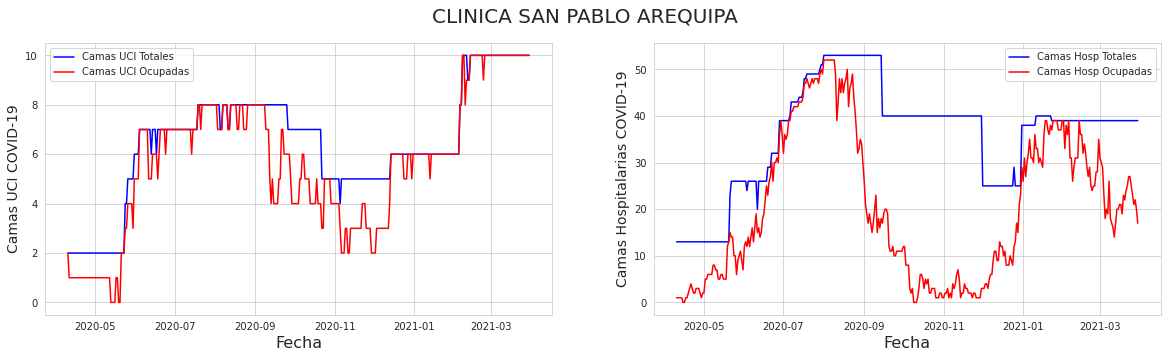

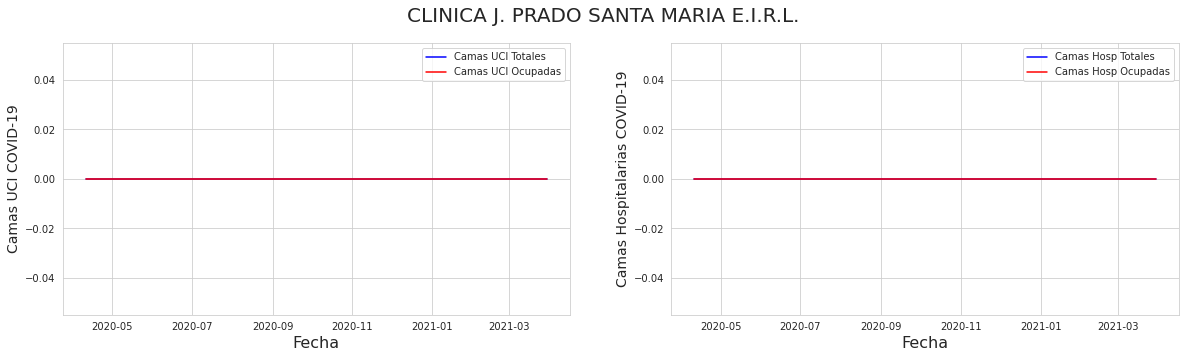

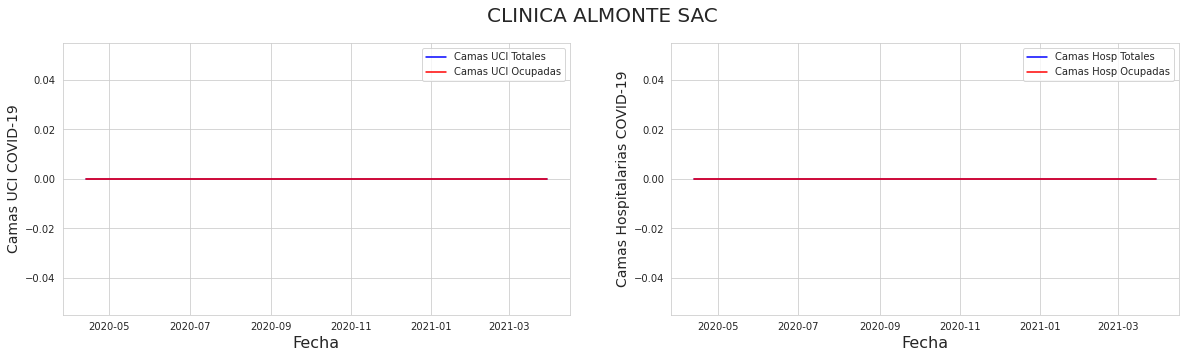

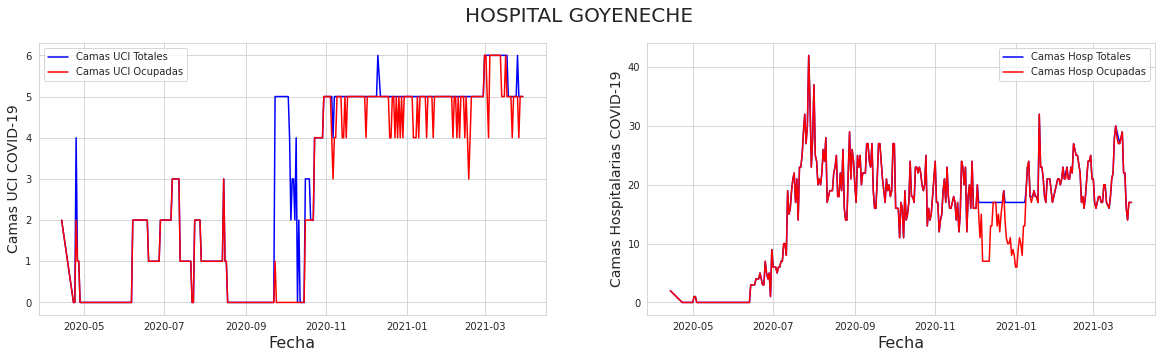

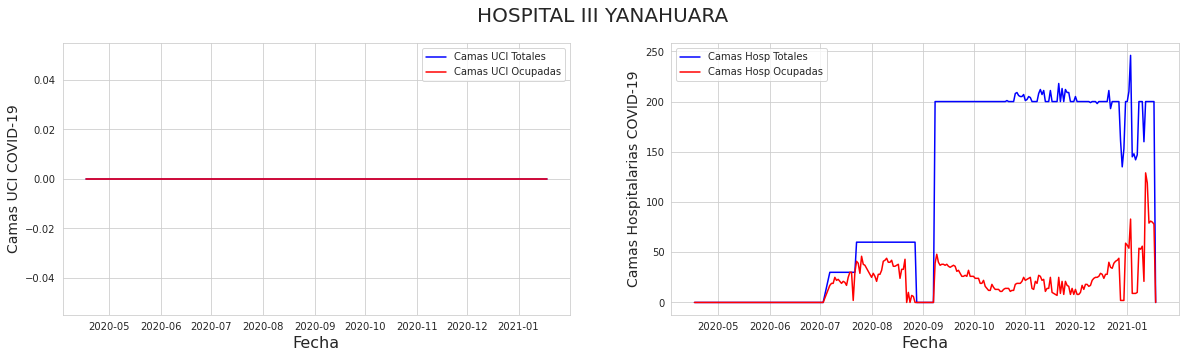

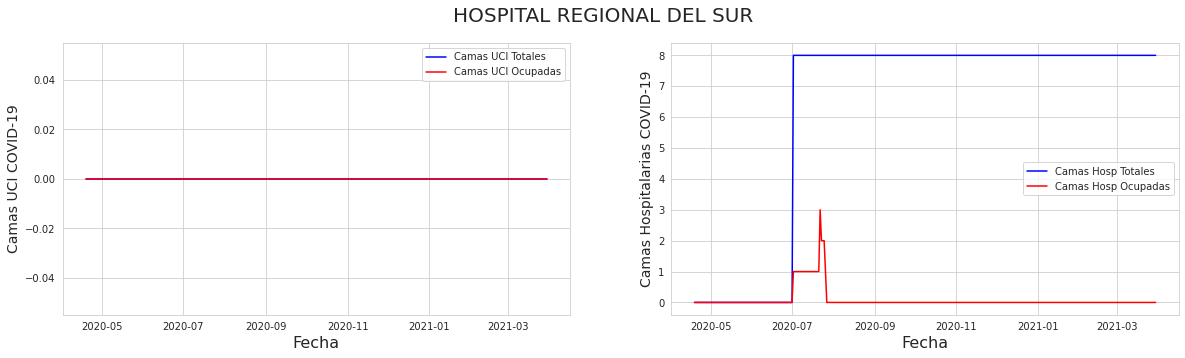

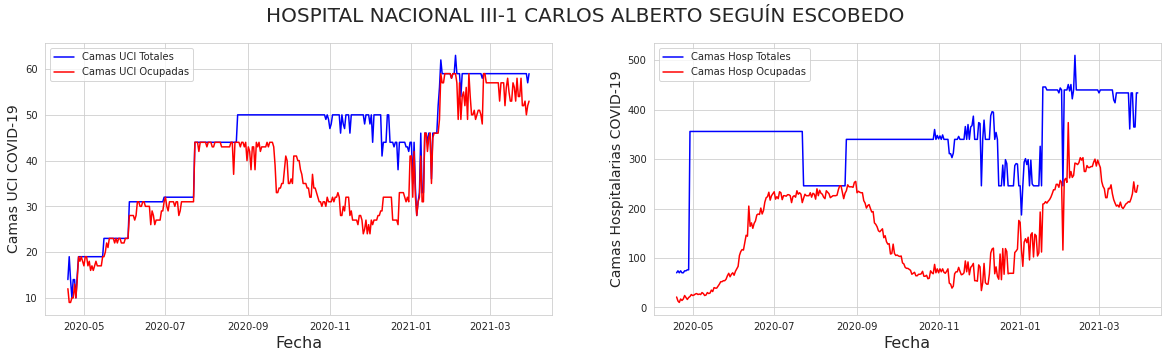

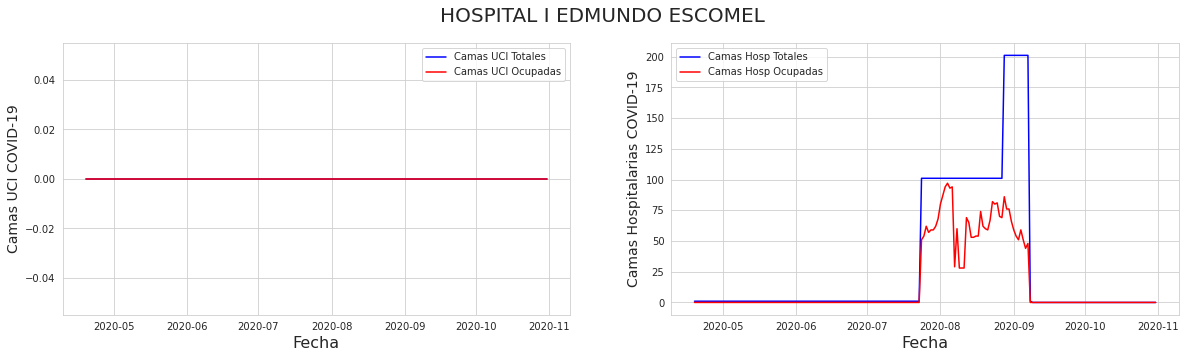

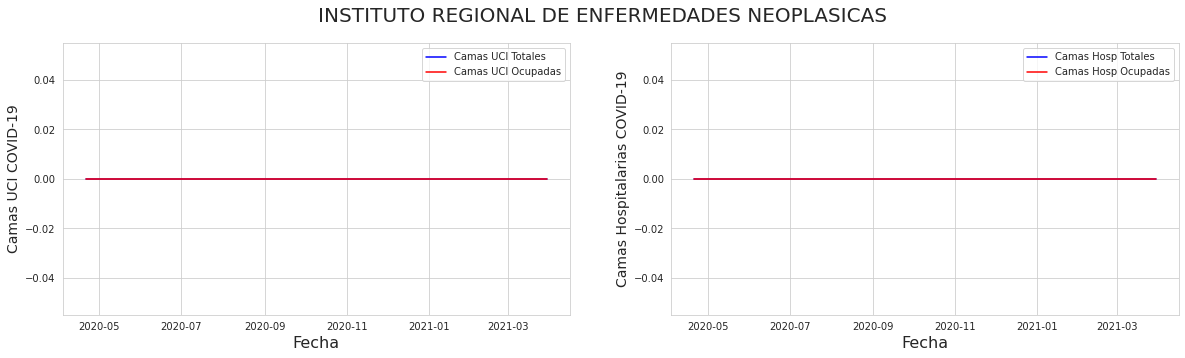

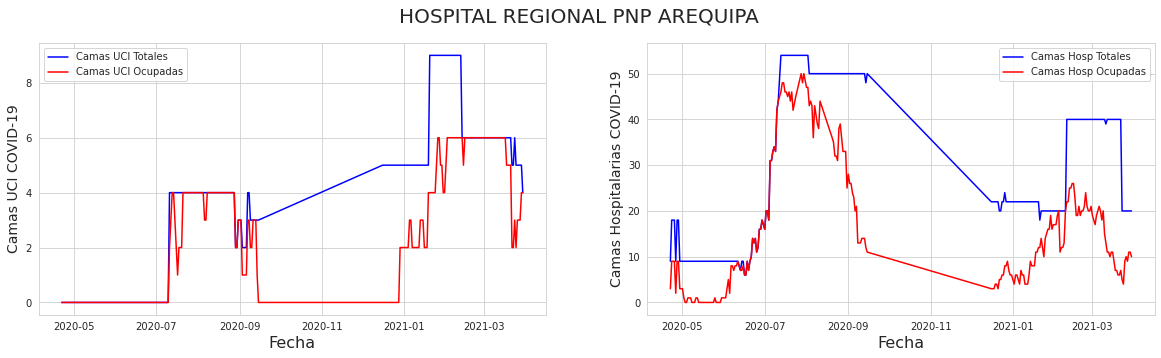

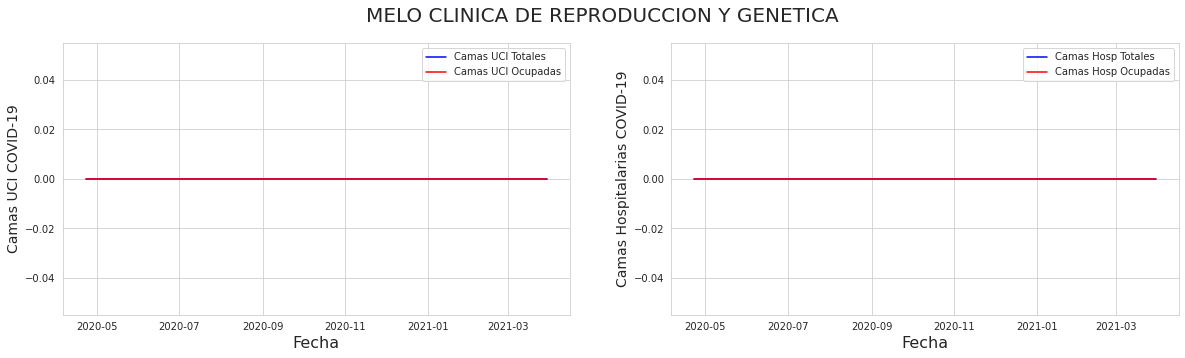

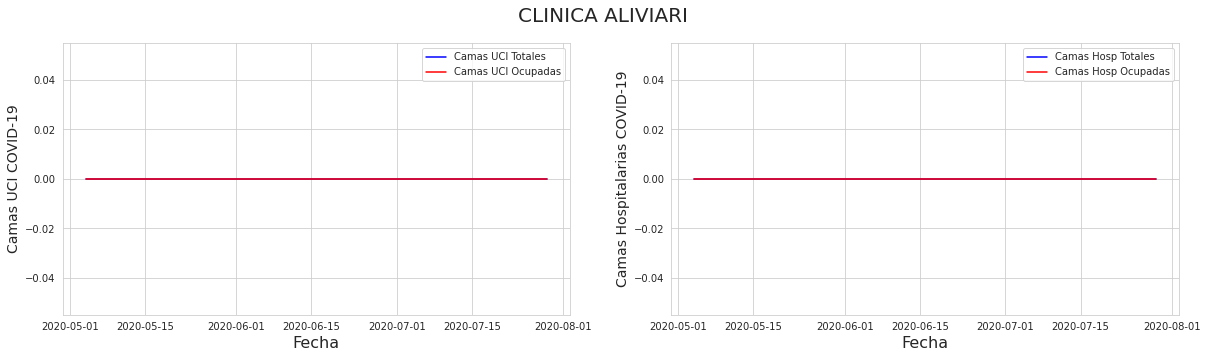

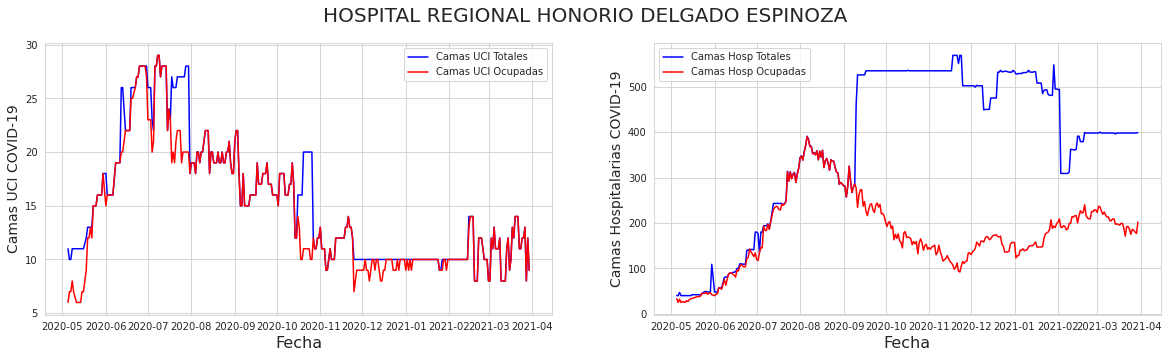

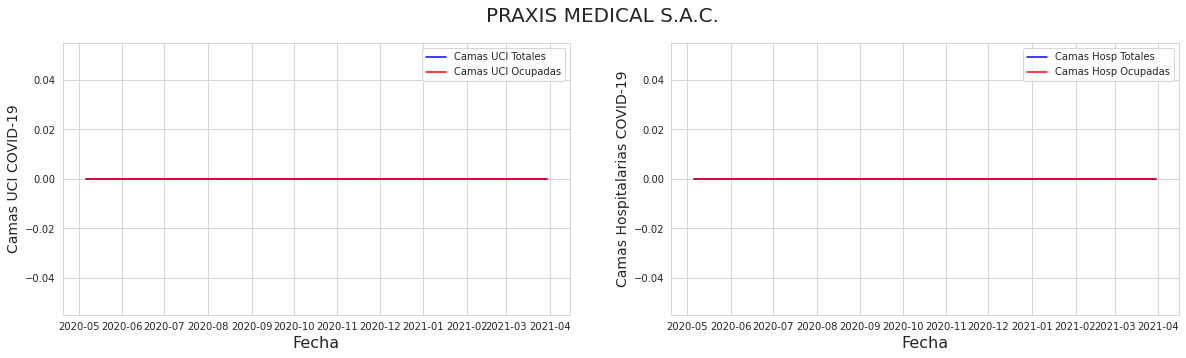

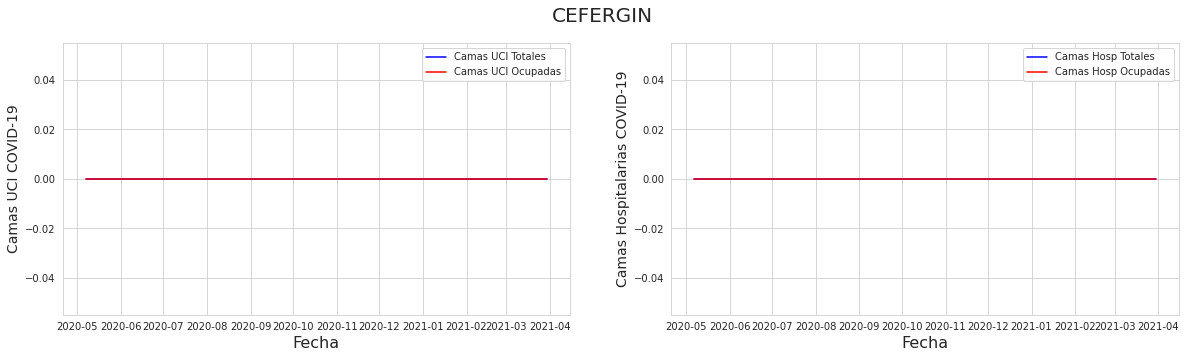

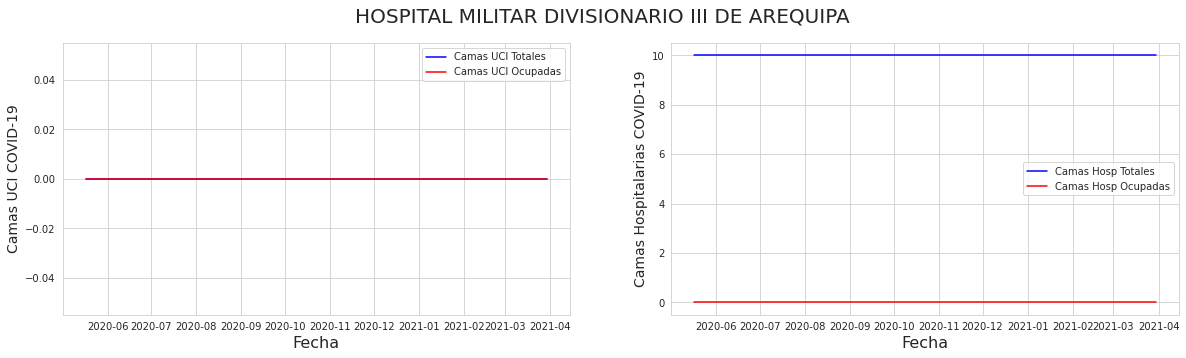

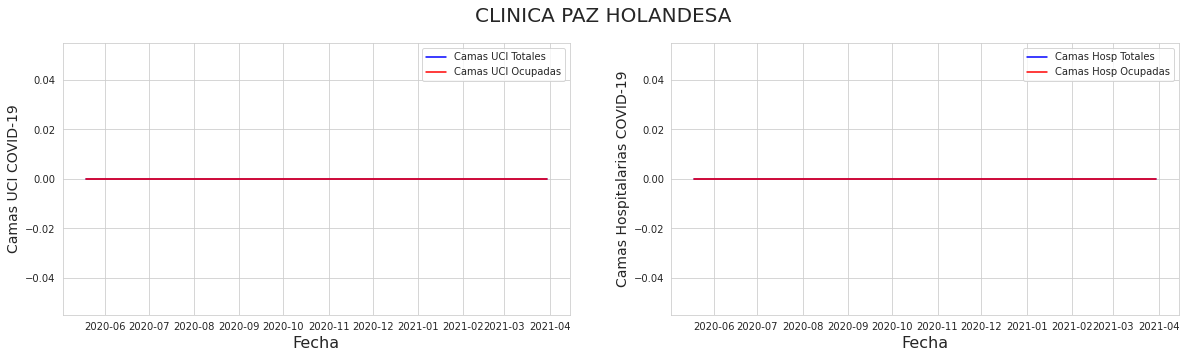

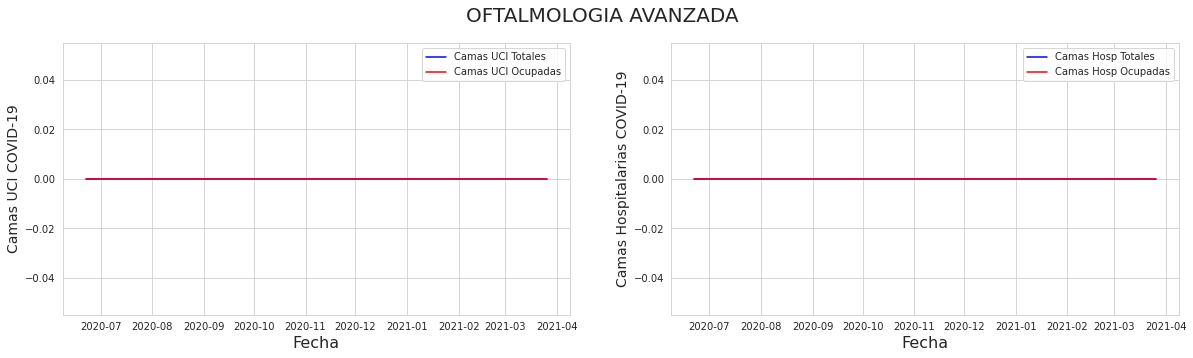

In [68]:
for institucion in df_arequipa_provincia_sin_duplicados.NOMBRE.unique():
    subplot(institucion)

## v2.0

In [69]:
df2_arequipa_provincias = df2[df2['REGION'] == 'AREQUIPA'].sort_values('FECHA')
df2_arequipa_provincias.reset_index(inplace=True, drop=True)

In [70]:
df2_arequipa_provincias_sin_duplicados = df2_arequipa_provincias.drop(['FECHAREGISTRO','FECHA'], 1)
df2_arequipa_provincias_sin_duplicados = df2_arequipa_provincias_sin_duplicados.drop_duplicates()

In [71]:
df2_arequipa_provincias_sin_duplicados.NOMBRE.unique()

array(['HOSPITAL GOYENECHE', 'CLINICA PAZ HOLANDESA',
       'OFTALMOLOGIA AVANZADA', 'PRAXIS MEDICAL S.A.C.',
       'HOSPITAL III YANAHUARA',
       'HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA',
       'CLINICA SAN JUAN DE DIOS', 'CLINICA ALMONTE SAC',
       'CLINICA AREQUIPA S.A.', 'CLINICA SAN PABLO AREQUIPA',
       'HOSPITAL I SAMUEL PASTOR DE CAMANA ESSALUD',
       'INSTITUTO REGIONAL DE ENFERMEDADES NEOPLASICAS',
       'HOSPITAL REGIONAL PNP AREQUIPA',
       'HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ESCOBEDO',
       'HOSPITAL DE CAMANA',
       'HOSPITAL II MANUEL DE TORRES MUÑOZ -  MOLLENDO',
       'CLINICA J. PRADO SANTA MARIA E.I.R.L.',
       'MELO CLINICA DE REPRODUCCION Y GENETICA',
       'HOSPITAL CENTRAL DE MAJES ING. ANGEL GABRIEL CHURA GALLEGOS',
       'HOSPITAL REGIONAL DEL SUR', 'CEFERGIN',
       'SISTEMAS DE ADMINISTRACION HOSPITALARIA S.A.C. (SANNA - CLINICA DEL SUR)',
       'HOSPITAL APLAO', 'CLINICA VALLESUR',
       'HOSPITAL MILITAR DIVISIONARIO

## Dividido por Instituciones

In [82]:
def subplot(institucion):
    df2_institucion = df2_arequipa_provincias_sin_duplicados[df2_arequipa_provincias_sin_duplicados['NOMBRE'] == institucion]

    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    sns.lineplot(data=df2_institucion, x="FECHA", y="CAMAS_ZC_TOTAL",  label='Camas UCI Totales', ax=ax1,color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas', ax=ax1,color='r')
    ax1.set_ylabel('Camas UCI COVID-19', fontsize=14)
    ax1.set_xlabel('Fecha', fontsize=16)

    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_TOTAL",  label='Camas Hosp Totales', ax=ax2, color='b')
    sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_ZNC_OCUPADOS", label='Camas Hosp Ocupadas',  ax=ax2, color='r')
    ax2.set_ylabel('Camas Hospitalarias COVID-19', fontsize=14)
    ax2.set_xlabel('Fecha', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax3)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax3)
    #ax3.set_ylabel('UCI_ADULTOS_CAMAS', fontsize=16)
    #ax3.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_PEDIATRIA_CAMAS_TOTAL",  label='UCI_PEDIATRIA_CAMAS_TOTAL', ax=ax4)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCI_PEDIATRIA_CAMAS_OCUPADAS", label='UCI_PEDIATRIA_CAMAS_OCUPADAS',  ax=ax4)
    #ax4.set_ylabel('UCI_PEDIATRIA_CAMAS', fontsize=16)
    #ax4.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="UCIN_CAMAS_TOTAL",  label='UCIN_CAMAS_TOTAL', ax=ax5)
    #sns.lineplot(data=df_institucion, x="FECHA", y="UCIN_CAMAS_OCUPADAS", label='UCIN_CAMAS_OCUPADAS',  ax=ax5)
    #ax5.set_ylabel('UCIN_CAMAS', fontsize=16)
    #ax5.set_xlabel('FECHA', fontsize=16)

    #sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax6)
    #sns.lineplot(data=df_institucion, x="FECHA", y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax6)
    #ax6.set_ylabel('CAMAS_HOSP', fontsize=16)
    #ax6.set_xlabel('FECHA', fontsize=16)

    plt.suptitle(institucion, fontsize=20)
    plt.show()

ValueError: ignored

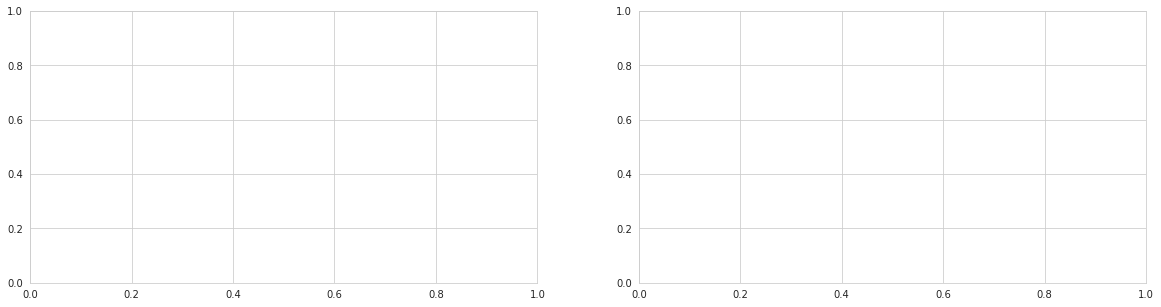

In [83]:
for institucion in df2_arequipa_provincias_sin_duplicados.NOMBRE.unique():
    subplot(institucion)

# Camas UCI Adultos

In [74]:
df_are_reg_sin_dup_ua = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['UCI_ADULTOS_CAMAS_OCUPADAS', 'UCI_ADULTOS_CAMAS_TOTAL'].sum()
df_are_reg_sin_dup_ua.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UCI_ADULTOS_CAMAS_OCUPADAS,UCI_ADULTOS_CAMAS_TOTAL
FECHA,,
2021-03-26,18,22
2021-03-27,18,22
2021-03-28,18,22
2021-03-29,17,20
2021-03-30,18,22


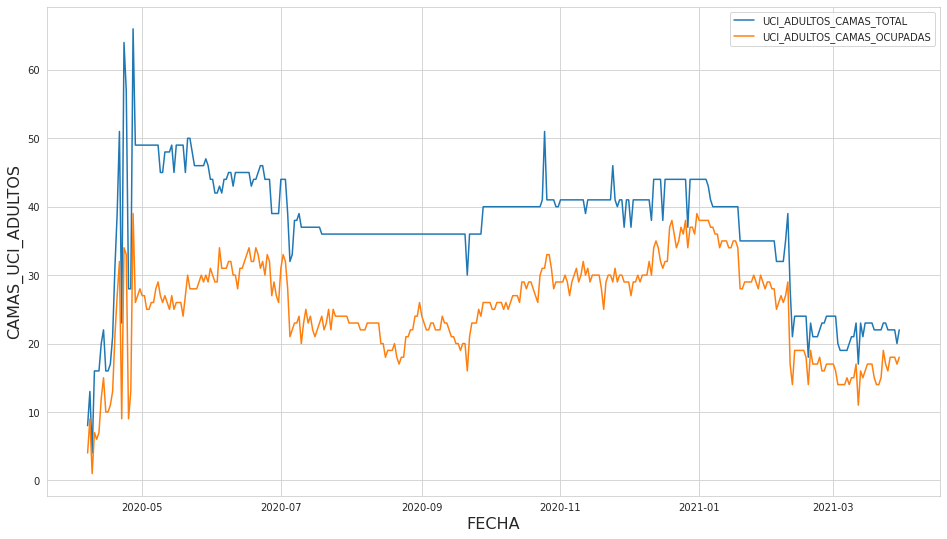

In [75]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_ua, x=df_are_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_TOTAL",  label='UCI_ADULTOS_CAMAS_TOTAL', ax=ax1)
sns.lineplot(data=df_are_reg_sin_dup_ua, x=df_are_reg_sin_dup_ua.index, y="UCI_ADULTOS_CAMAS_OCUPADAS", label='UCI_ADULTOS_CAMAS_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_UCI_ADULTOS', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Camas Hospitaliarias Ocupadas

In [76]:
df_are_reg_sin_dup_cho = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['CAMAS_HOSP_OCUPADAS', 'CAMAS_HOSP_TOTAL'].sum()
df_are_reg_sin_dup_cho.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_HOSP_OCUPADAS,CAMAS_HOSP_TOTAL
FECHA,,
2021-03-26,690,1086
2021-03-27,649,1025
2021-03-28,631,1025
2021-03-29,635,1050
2021-03-30,671,1086


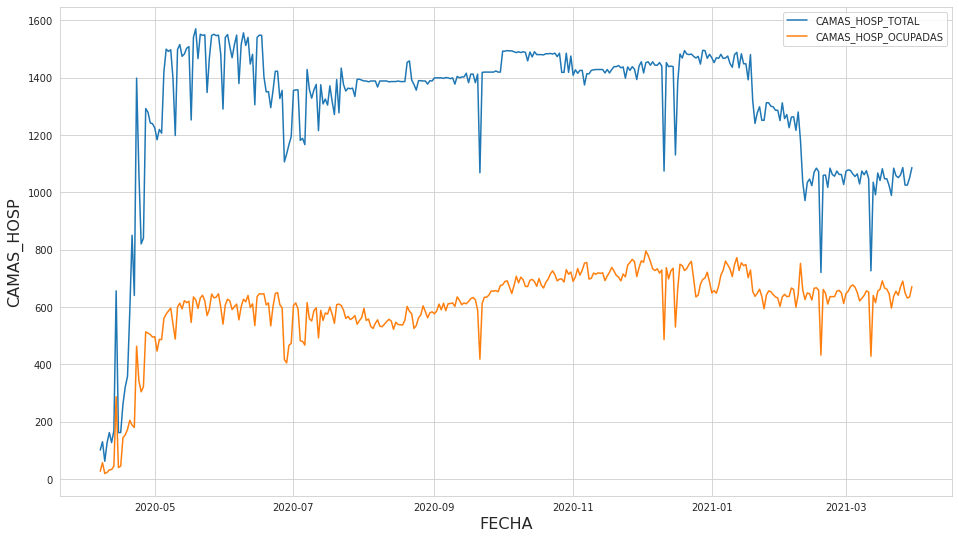

In [77]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_cho, x=df_are_reg_sin_dup_cho.index, y="CAMAS_HOSP_TOTAL",  label='CAMAS_HOSP_TOTAL', ax=ax1)
sns.lineplot(data=df_are_reg_sin_dup_cho, x=df_are_reg_sin_dup_cho.index, y="CAMAS_HOSP_OCUPADAS", label='CAMAS_HOSP_OCUPADAS',  ax=ax1)
ax1.set_ylabel('CAMAS_HOSP', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

## Ventiladores UCI ZC Ocupados

In [78]:
df_are_reg_sin_dup_vuzc = df_arequipa_region_sin_duplicados.groupby(['FECHA'])['VENTILADORES_UCI_ZC_OCUPADOS', 'VENTILADORES_UCI_ZC_TOTAL'].sum()
df_are_reg_sin_dup_vuzc.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VENTILADORES_UCI_ZC_OCUPADOS,VENTILADORES_UCI_ZC_TOTAL
FECHA,,
2021-03-26,88,102
2021-03-27,87,100
2021-03-28,80,95
2021-03-29,83,93
2021-03-30,85,96


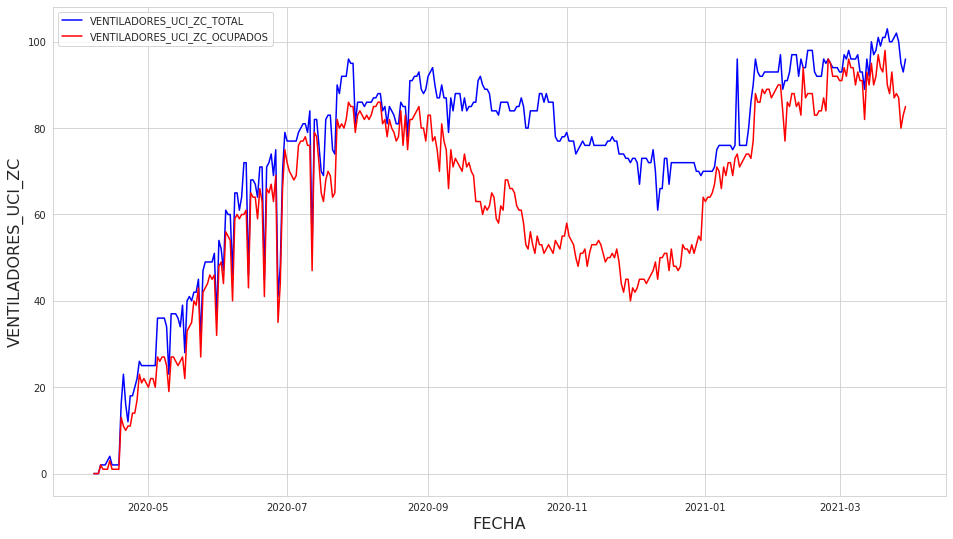

In [79]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

sns.lineplot(data=df_are_reg_sin_dup_vuzc, x=df_are_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_TOTAL",  label='VENTILADORES_UCI_ZC_TOTAL', ax=ax1,color='b')
sns.lineplot(data=df_are_reg_sin_dup_vuzc, x=df_are_reg_sin_dup_vuzc.index, y="VENTILADORES_UCI_ZC_OCUPADOS", label='VENTILADORES_UCI_ZC_OCUPADOS',  ax=ax1,color='r')
ax1.set_ylabel('VENTILADORES_UCI_ZC', fontsize=16)
ax1.set_xlabel('FECHA', fontsize=16)

plt.show()

# Hospitales: Disponibilidad de Camas 

In [84]:
df_are_pro_sin_dup_hos = df_arequipa_provincia_sin_duplicados[df_arequipa_provincia_sin_duplicados['NOMBRE'].str.startswith('HOSP', na=False)].sort_values('FECHA')
df_are_pro_sin_dup_hos[['INSTITUCION', 'NOMBRE', 'FECHA', 'CAMAS_ZC_OCUPADOS', 'CAMAS_ZC_DISPONIBLES', 'CAMAS_ZC_TOTAL']].sort_values('FECHA').tail(30)

,INSTITUCION,NOMBRE,FECHA,CAMAS_ZC_OCUPADOS,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_TOTAL
7411,FFAA y PNP,HOSPITAL REGIONAL PNP AREQUIPA,2021-03-26,3,2,5
7413,FFAA y PNP,HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA,2021-03-26,0,0,0
7417,Gob Regional,HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,2021-03-26,12,0,12
7421,EsSalud,HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ...,2021-03-26,52,7,59
7423,Gob Regional,HOSPITAL GOYENECHE,2021-03-26,5,1,6
7428,FFAA y PNP,HOSPITAL REGIONAL DEL SUR,2021-03-26,0,0,0
7435,Gob Regional,HOSPITAL REGIONAL HONORIO DELGADO ESPINOZA,2021-03-27,13,0,13
7432,EsSalud,HOSPITAL NACIONAL III-1 CARLOS ALBERTO SEGUÍN ...,2021-03-27,53,6,59
7429,Gob Regional,HOSPITAL GOYENECHE,2021-03-27,4,1,5
7441,FFAA y PNP,HOSPITAL MILITAR DIVISIONARIO III DE AREQUIPA,2021-03-27,0,0,0


In [85]:
df_are_pro_sin_dup_hos_gb = df_are_pro_sin_dup_hos.groupby(['FECHA'])['CAMAS_ZC_DISPONIBLES', 'CAMAS_ZC_OCUPADOS','CAMAS_ZC_TOTAL'].sum()
df_are_pro_sin_dup_hos_gb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CAMAS_ZC_DISPONIBLES,CAMAS_ZC_OCUPADOS,CAMAS_ZC_TOTAL
FECHA,,,
2020-04-14,0,2,2
2020-04-17,0,0,0
2020-04-18,0,0,0
2020-04-19,2,12,14
2020-04-20,10,9,19
...,...,...,...
2021-03-26,10,72,82
2021-03-27,9,73,82
2021-03-28,11,66,77


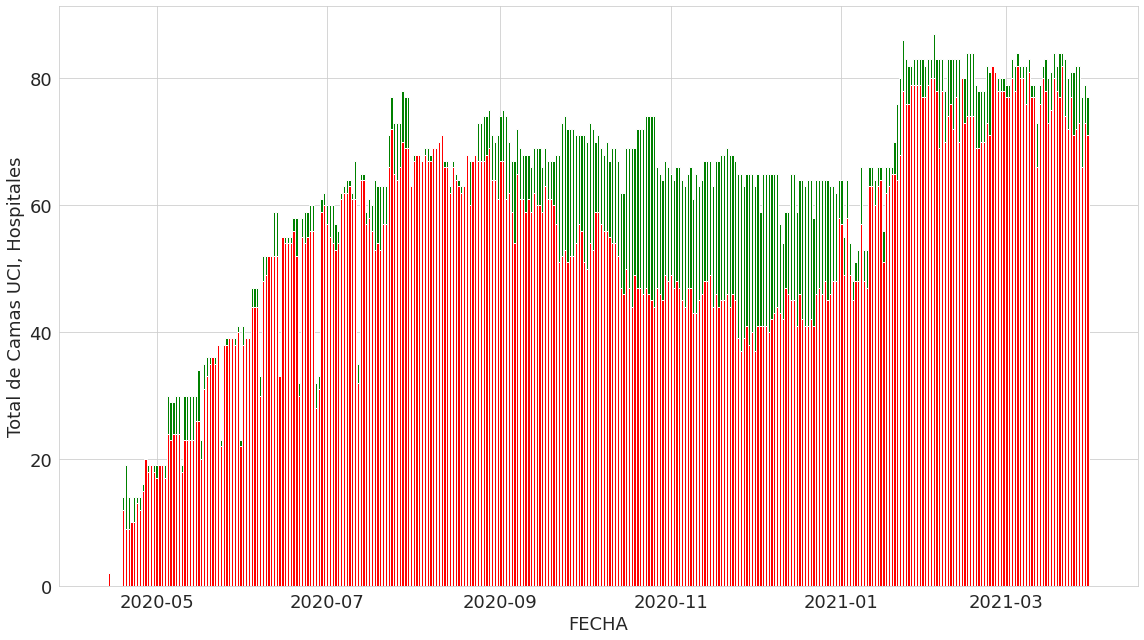

<Figure size 432x288 with 0 Axes>

In [86]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
ax1.bar(df_are_pro_sin_dup_hos_gb.index, \
        df_are_pro_sin_dup_hos_gb['CAMAS_ZC_OCUPADOS'], color='r',)

ax1.bar(df_are_pro_sin_dup_hos_gb.index, \
        df_are_pro_sin_dup_hos_gb['CAMAS_ZC_DISPONIBLES'], color='g', \
        bottom=df_are_pro_sin_dup_hos_gb['CAMAS_ZC_OCUPADOS'])

ax1.tick_params(labelsize=18)
ax1.set_xlabel('FECHA',fontsize=18)
ax1.set_ylabel('Total de Camas UCI, Hospitales',fontsize=18)
 
fig.tight_layout()

plt.show()
plt.clf()

In [88]:
df2_arequipa_provincia_sin_duplicados_hospitales['CATEGORIA'].unique()

NameError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="CAMAS_ZC_DISPONIBLES",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('CAMAS_ZC_DISPONIBLES', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="CAMAS_ZNC_DISPONIBLE",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('CAMAS_ZNC_DISPONIBLE', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="UCI_ADULTOS_CAMAS_DISPONIBLE",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('UCI_ADULTOS_CAMAS_DISPONIBLE', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=df_arequipa_provincia_sin_duplicados_hospitales, x="FECHA", y="CAMAS_HOSP_DISPONIBLE",  ax=ax, hue='NOMBRE')
plt.xticks(rotation=90)

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('CAMAS_HOSP_DISPONIBLE', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()